# Draw Beams 3D 


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date : June 29th 2020


In [308]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle,Ellipse

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3D
#%matplotlib notebook

In [309]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

In [310]:
from scipy.interpolate import interp1d

## Constants for conversions

In [311]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [312]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [313]:
deg_to_rad=np.pi/180.

In [314]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [315]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [316]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [317]:
Det_xpic=24.0 # microns per pixel
#Det_NbPix=2048 # number of pixels per CCD side
Det_NbPix=2512 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [318]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [319]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [320]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [321]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [322]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [323]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [324]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

# Read input files

In [325]:
def GetBeamParam(df):
    X0C=df["X0"].mean()
    Y0C=df["Y0"].mean()
    RXMAX=np.max(np.abs(df["X0"].values-X0C))
    RYMAX=np.max(np.abs(df["Y0"].values-Y0C))   
    RMAX=np.max(np.array([RXMAX,RYMAX]))
    return X0C,Y0C,RMAX

In [326]:
def Select_Beam(row):
    return (row["X0"]-X0C)**2+(row["Y0"]-Y0C)**2 <= RMAX**2

In [327]:
FLAG_R350=True # show RON350 instead of R200

In [328]:
#rayfile_hoe=Beam4_Rayfile+"_RAY_HOE_OUT.xlsx"
#rayfile_R400=Beam4_Rayfile+"_RAY_RON400_OUT.xlsx"
#rayfile_R200=Beam4_Rayfile+"_RAY_RON200_OUT.xlsx"
#rayfile_R350=Beam4_Rayfile+"_RAY_RON350_OUT.xlsx"

In [329]:
rayfile_hoe="HOE_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"
rayfile_R200="R200_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"
rayfile_R350="R350_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"
rayfile_R400="R400_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"

## Read HOE

In [330]:
input_hoe = pd.ExcelFile(rayfile_hoe)
df_hoe = input_hoe.parse(index_row=0,header=1)
df_hoe=df_hoe.iloc[0:NBTOT]

In [331]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,8.27790,-0.01283,79.99998,0,0,8.27790,-0.01283,80,OK,3
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,8.28523,-0.01285,79.99998,0,0,8.28523,-0.01285,80,OK,3
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,8.29260,-0.01287,79.99998,0,0,8.29260,-0.01287,80,OK,3
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842679,-2.10670,...,8.30001,-0.01289,79.99998,0,0,8.30001,-0.01289,80,OK,3
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,8.30745,-0.01291,79.99998,0,0,8.30745,-0.01291,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,21.97558,-0.05372,79.99998,0,0,21.97558,-0.05372,80,OK,3
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842679,2.10670,...,21.94330,-0.05361,79.99998,0,0,21.94330,-0.05361,80,OK,3
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,21.91098,-0.05350,79.99998,0,0,21.91098,-0.05350,80,OK,3
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,21.87866,-0.05338,79.99998,0,0,21.87866,-0.05338,80,OK,3


In [332]:
# rename columns otherwise they are not recognize and swap X,Y
#df_hoe.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]
#df_hoe.columns = ["Y0","X0","Z0","V0","U0","W0","wave","col","Y1","X1","Z1","Y2","X2","Z2","Y3","X3","Z3","Yfinal","Xfinal","Zfinal","Notes"]

In [333]:
#df_hoe

In [334]:
X0C,Y0C,RMAX=GetBeamParam(df_hoe)

In [335]:
df_filter=df_hoe.copy()
df_filter=df_filter.loc[df_filter.apply(Select_Beam, axis=1)]
df_filter=df_filter.reset_index()   # reset index
df_hoe=df_filter.copy()

<IPython.core.display.Javascript object>


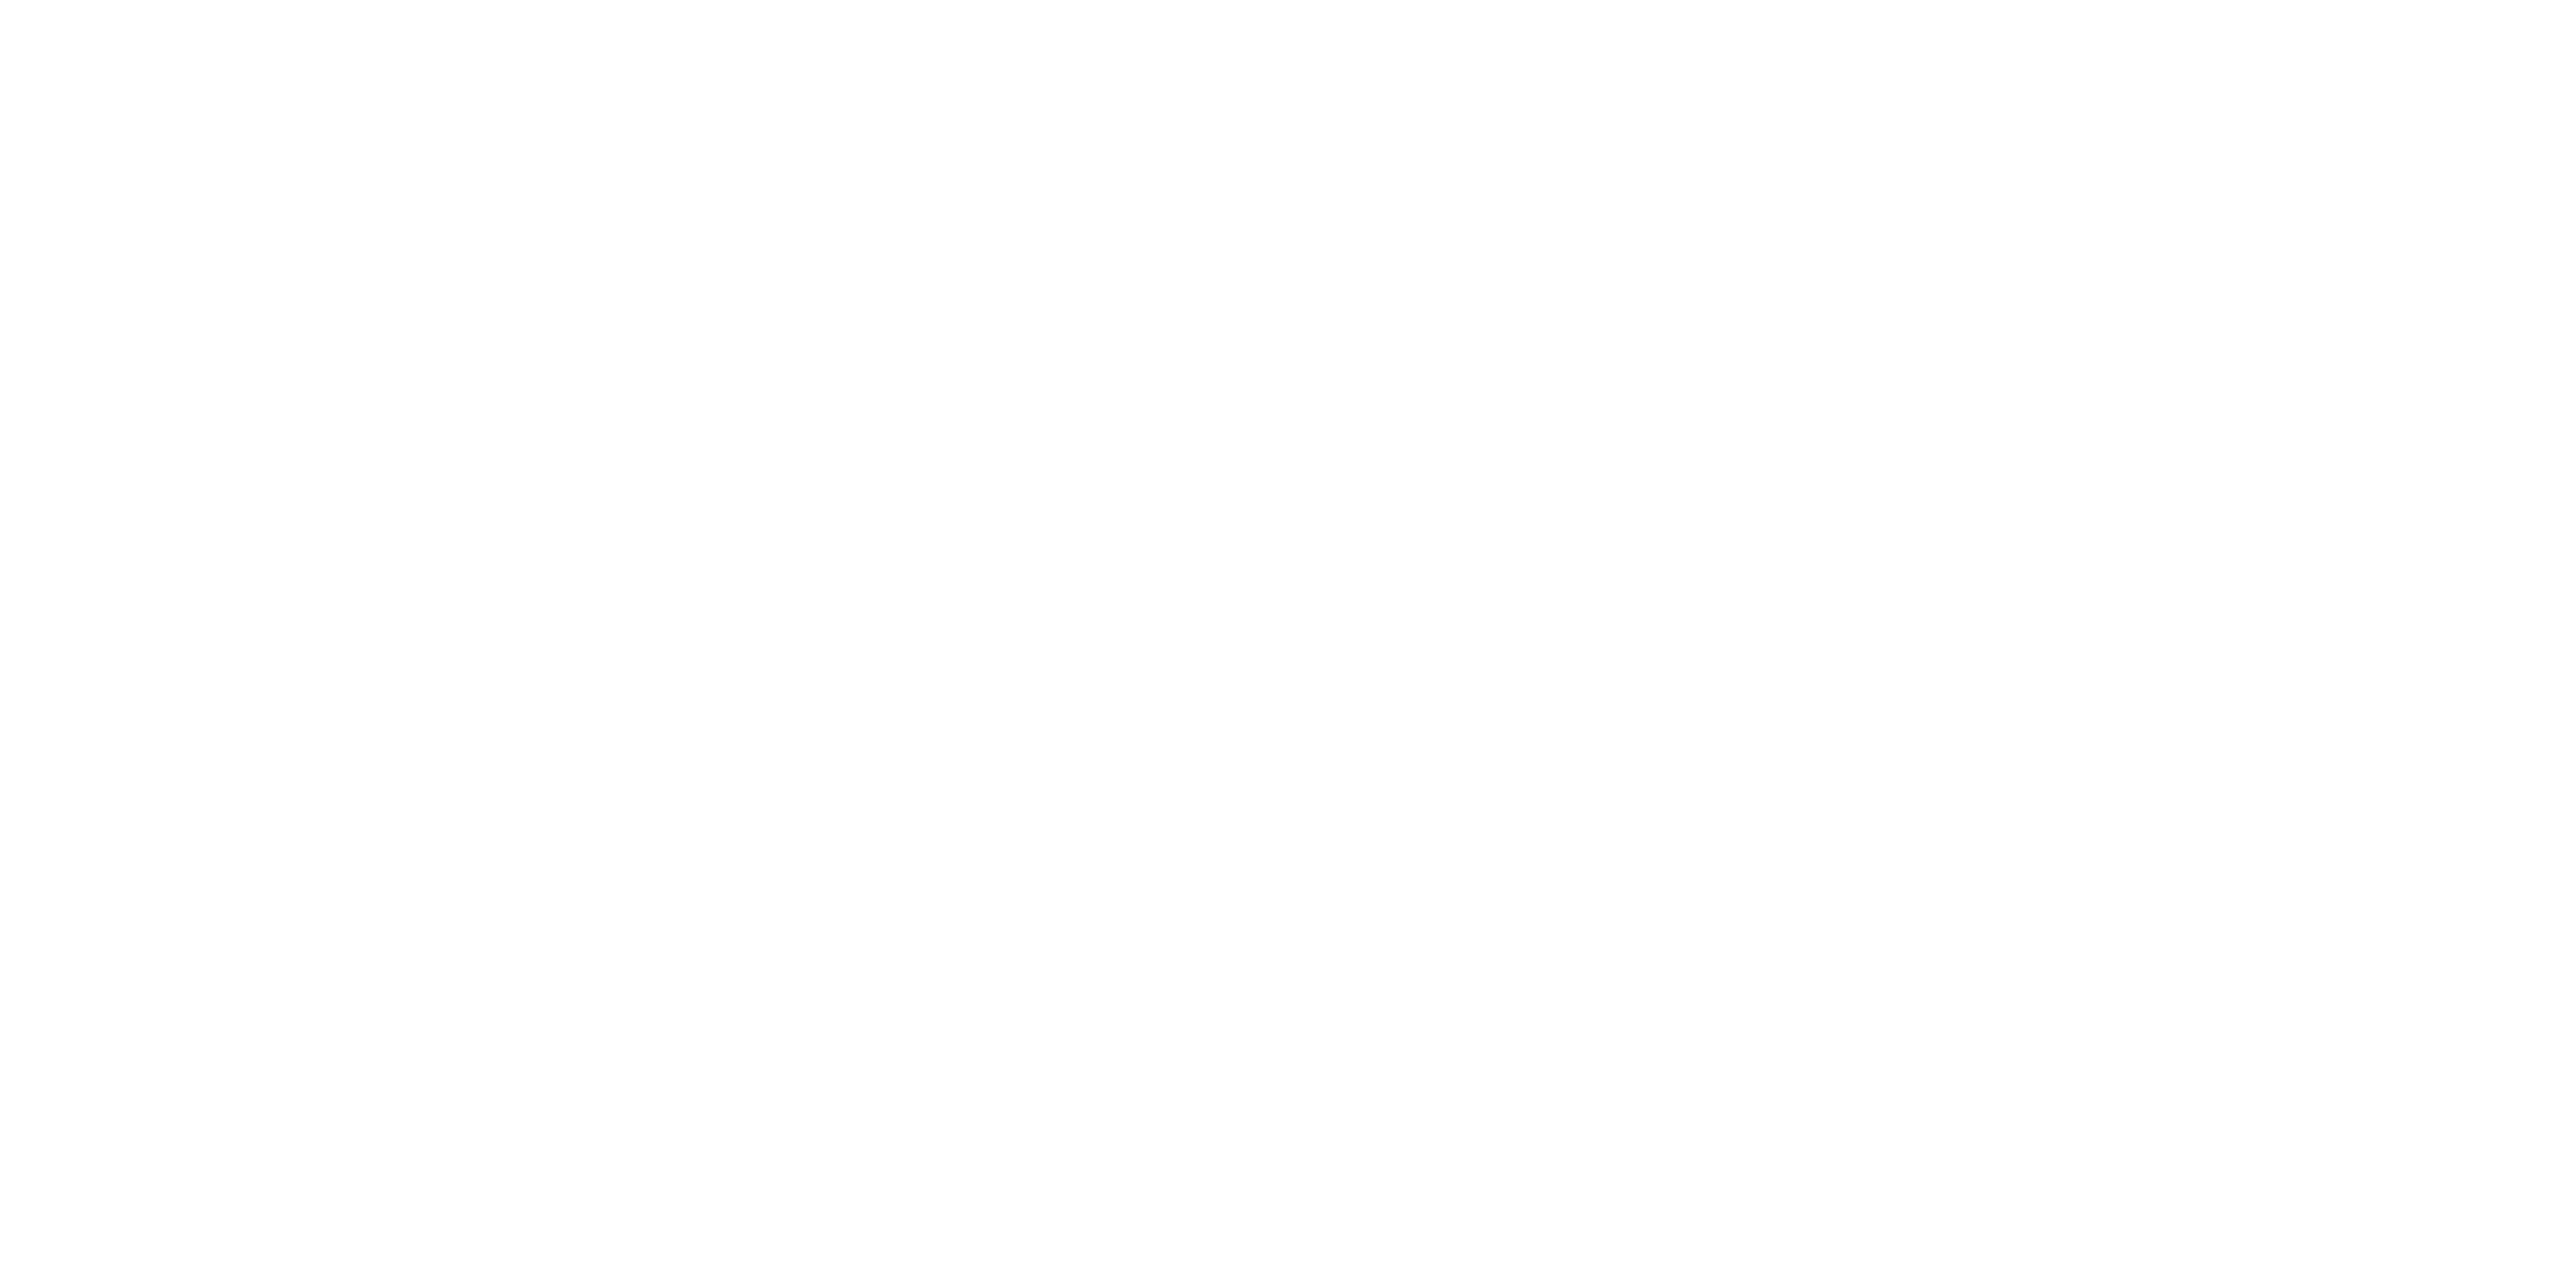

Text(0.5, 0.98, 'HOE :Filtered circular beam')

<IPython.core.display.Javascript object>


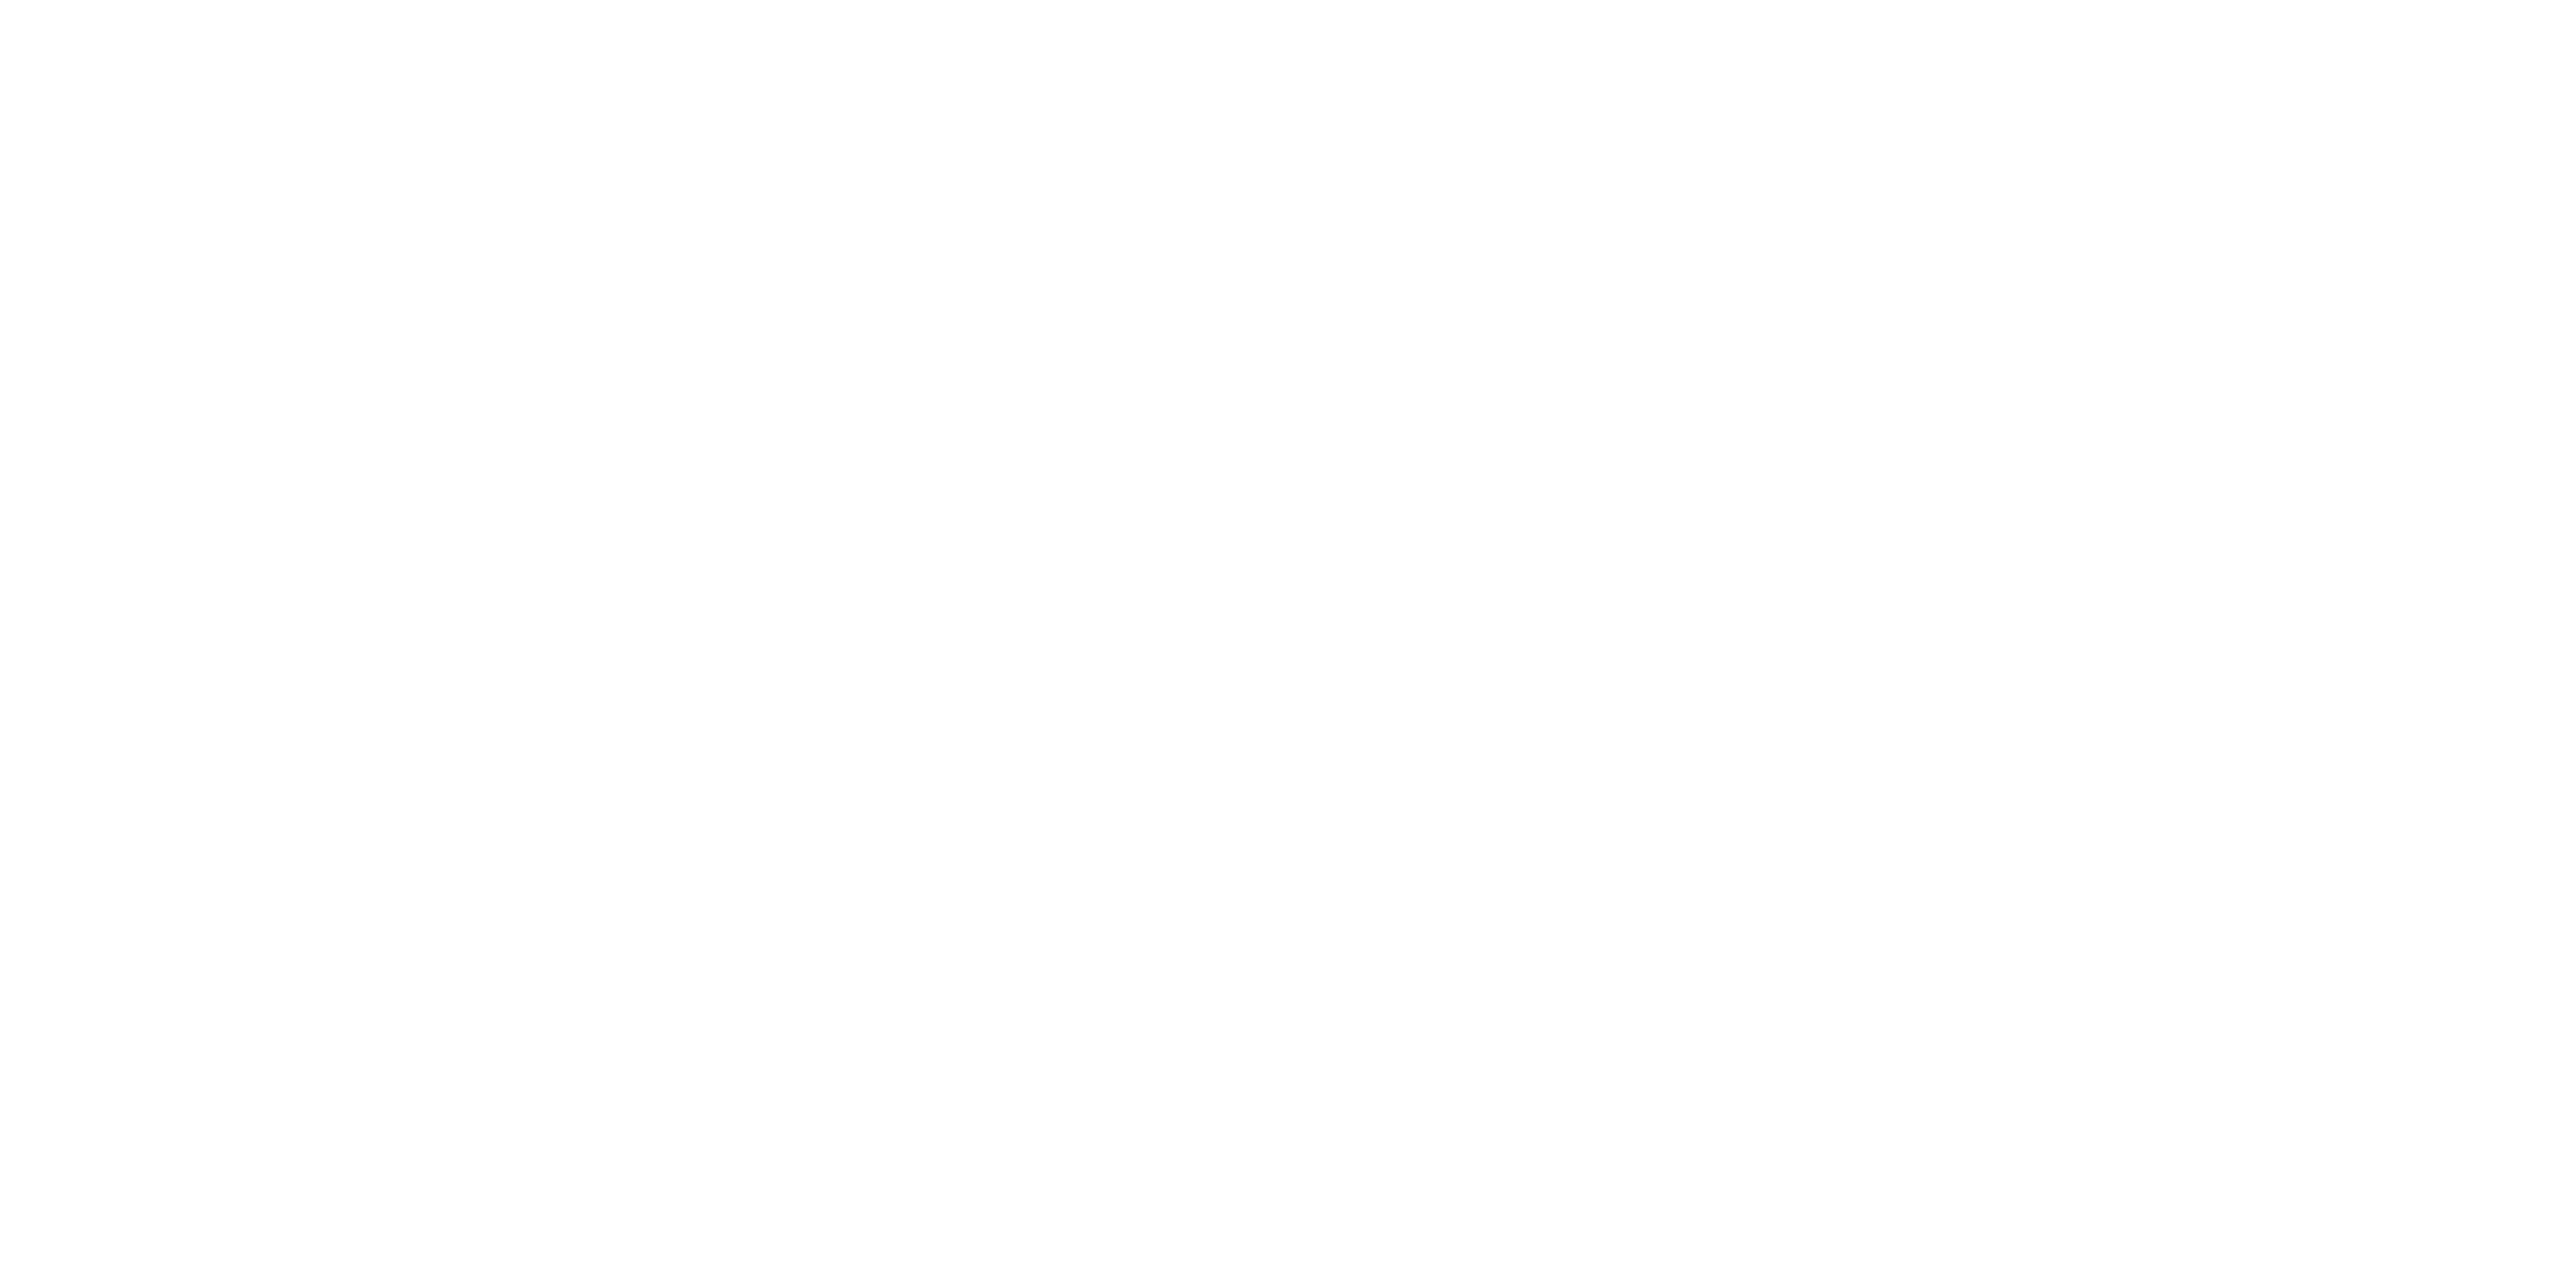

In [336]:
f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(18,9),sharex=True,sharey=True)
df_filter.plot.scatter(x="X0", y="Y0",c="DarkBlue",marker="o",ax=ax1)
ax1.set_aspect("equal")
ax1.grid()

q = ax2.quiver(df_filter["X0"], df_filter["Y0"], df_filter["U0"], df_filter["V0"],color="red")
ax2.set_aspect("equal")
ax2.set_xlabel("X0 (mm)")
ax2.grid()

plt.suptitle("HOE :Filtered circular beam")

## Read R400

In [337]:
input_R400 = pd.ExcelFile(rayfile_R400)
df_R400 = input_R400.parse(index_row=0,header=1)
df_R400=df_R400.iloc[0:NBTOT]

In [338]:
# rename columns otherwise they are not recognize
#df_R400.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [339]:
df_R400

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,9.50870,0.03953,80,0,0,9.50870,0.03953,80,OK,3
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,9.48531,0.03701,80,0,0,9.48531,0.03701,80,OK,3
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,9.46349,0.03451,80,0,0,9.46349,0.03451,80,OK,3
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,9.44321,0.03201,80,0,0,9.44321,0.03201,80,OK,3
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,9.42447,0.02953,80,0,0,9.42447,0.02953,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,25.21121,-0.18127,80,0,0,25.21121,-0.18127,80,OK,3
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,25.09532,-0.17373,80,0,0,25.09532,-0.17373,80,OK,3
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,24.98470,-0.16628,80,0,0,24.98470,-0.16628,80,OK,3
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,24.87929,-0.15892,80,0,0,24.87929,-0.15892,80,OK,3


In [340]:
X0C,Y0C,RMAX=GetBeamParam(df_R400)

In [341]:
df_filter=df_R400.copy()
df_filter=df_filter.loc[df_filter.apply(Select_Beam, axis=1)]
df_filter=df_filter.reset_index()   # reset index
df_R400=df_filter.copy()

<IPython.core.display.Javascript object>


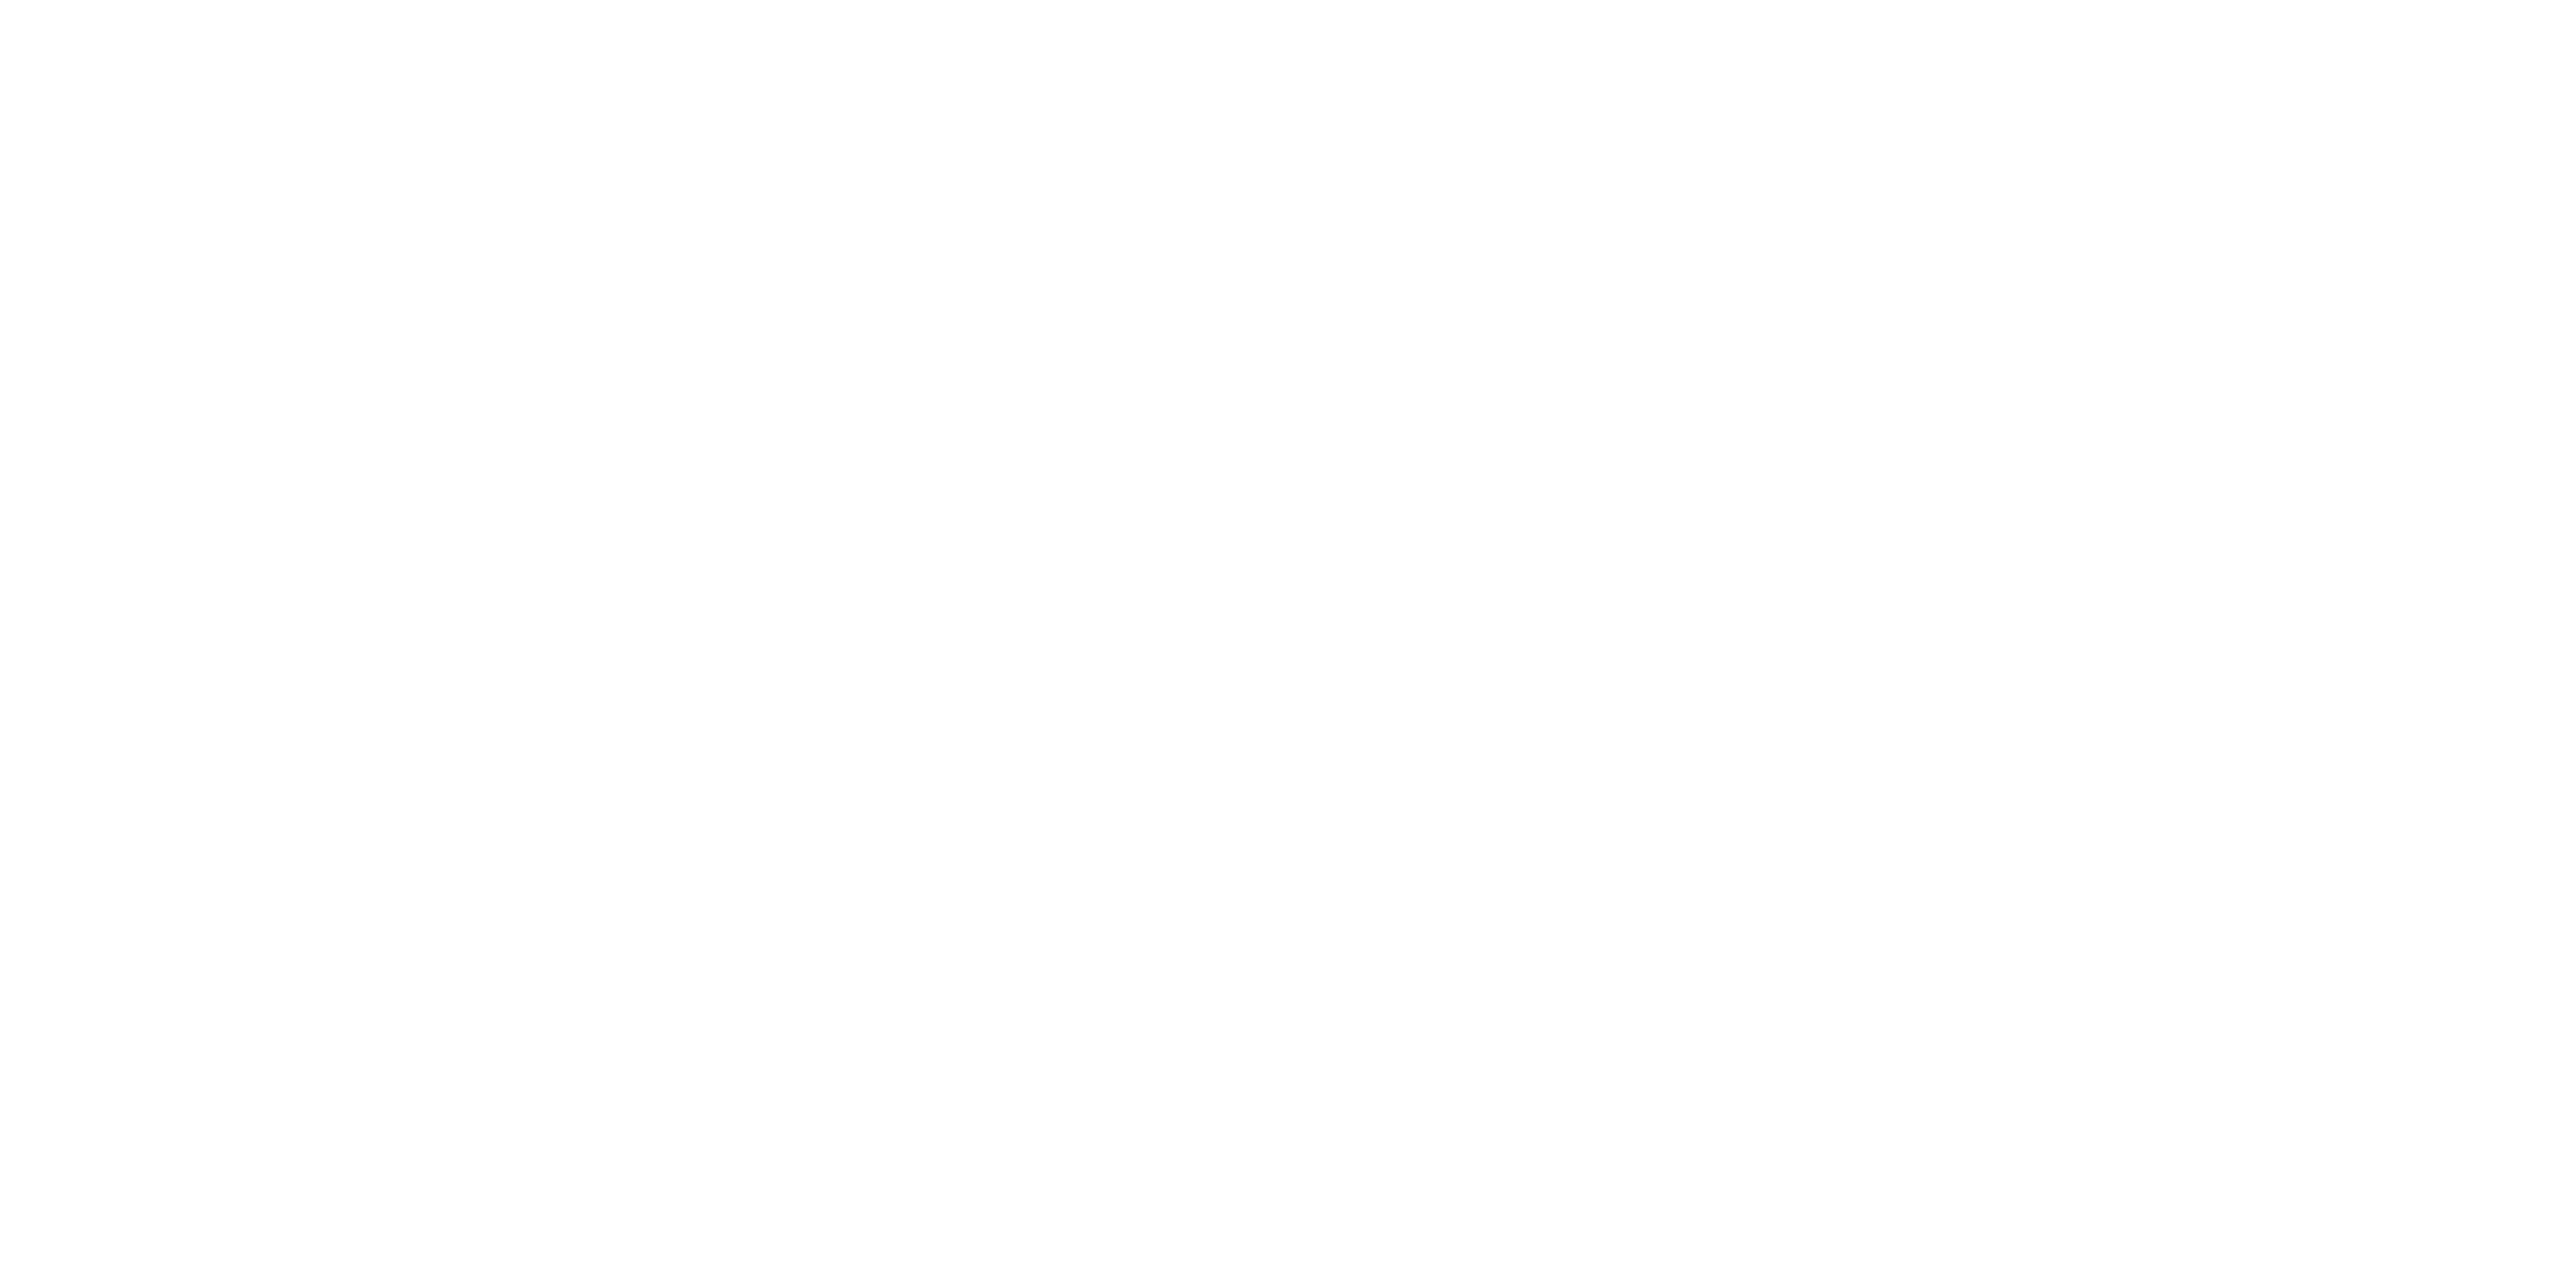

Text(0.5, 0.98, 'R400 : Filtered circular beam')

<IPython.core.display.Javascript object>


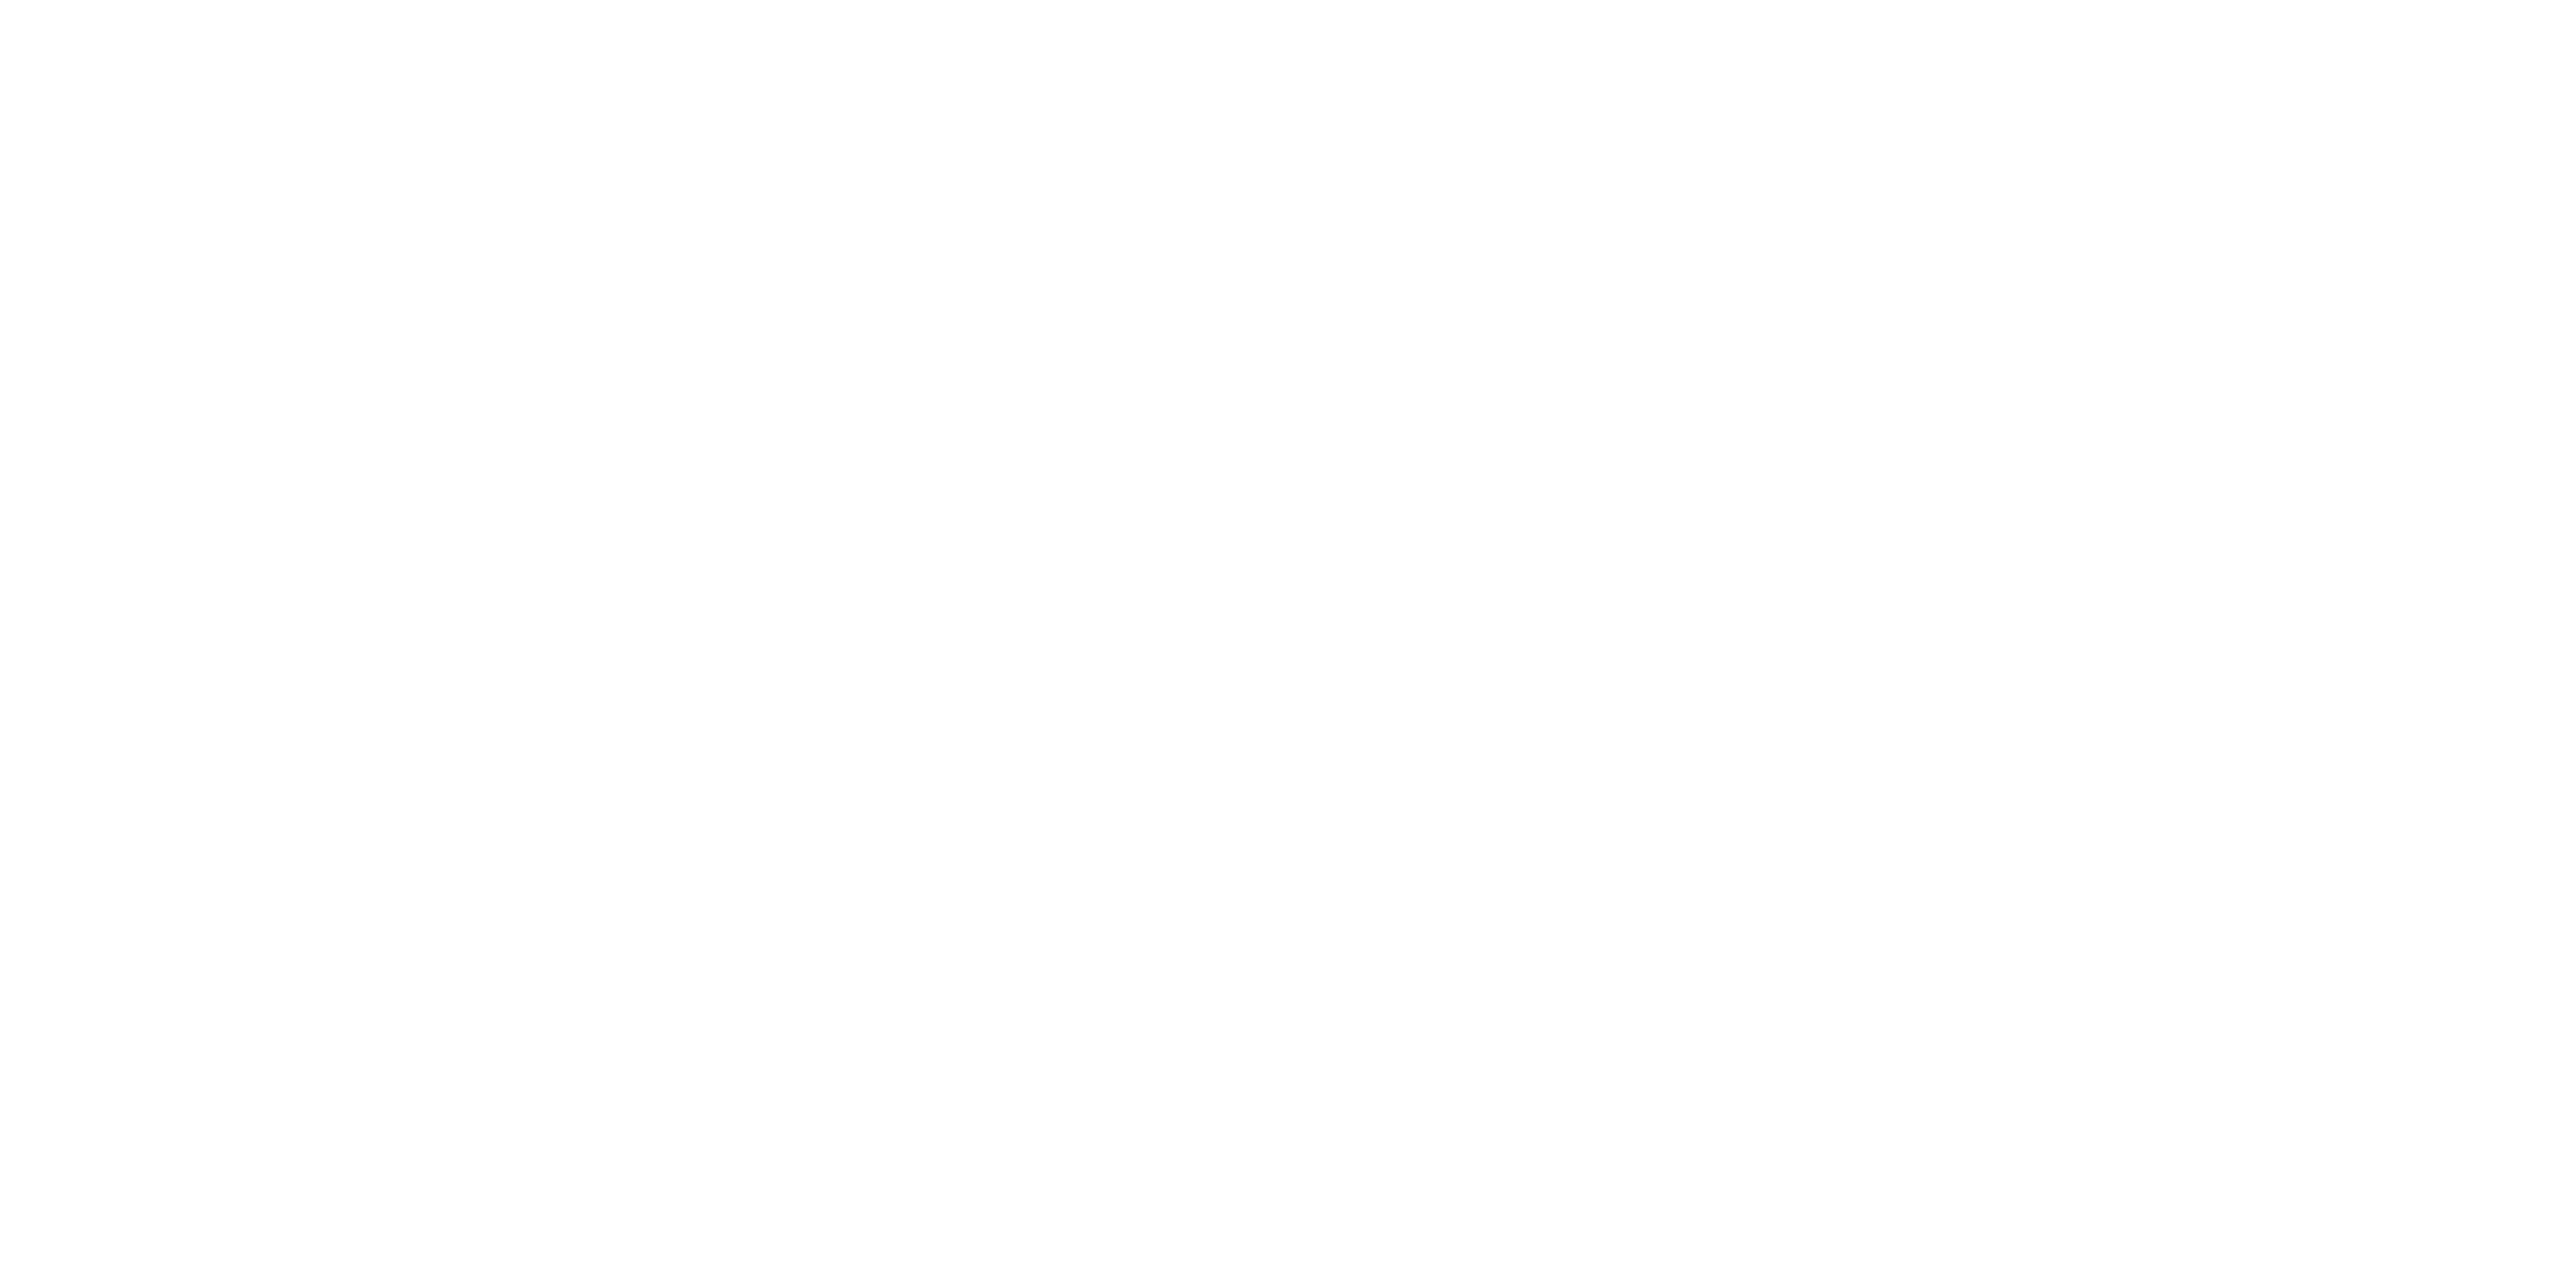

In [342]:
f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(18,9),sharex=True,sharey=True)
df_filter.plot.scatter(x="X0", y="Y0",c="DarkBlue",marker="o",ax=ax1)
ax1.set_aspect("equal")
ax1.grid()

q = ax2.quiver(df_filter["X0"], df_filter["Y0"], df_filter["U0"], df_filter["V0"],color="red")
ax2.set_aspect("equal")
ax2.set_xlabel("X0 (mm)")
ax2.grid()

plt.suptitle("R400 : Filtered circular beam")

## Read R200

In [343]:
input_R200 = pd.ExcelFile(rayfile_R200)
df_R200 = input_R200.parse(index_row=0,header=1)
df_R200=df_R200.iloc[0:NBTOT]

In [344]:
# rename columns otherwise they are not recognize
#df_R200.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [345]:
df_R200

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,4.68705,0.01269,80,0,0,4.68705,0.01269,80,OK,3
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,4.67976,0.01147,80,0,0,4.67976,0.01147,80,OK,3
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,4.67321,0.01027,80,0,0,4.67321,0.01027,80,OK,3
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,4.66738,0.00906,80,0,0,4.66738,0.00906,80,OK,3
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,4.66228,0.00786,80,0,0,4.66228,0.00786,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,11.82185,-0.03962,80,0,0,11.82185,-0.03962,80,OK,3
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,11.79859,-0.03650,80,0,0,11.79859,-0.03650,80,OK,3
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,11.77726,-0.03340,80,0,0,11.77726,-0.03340,80,OK,3
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,11.75785,-0.03031,80,0,0,11.75785,-0.03031,80,OK,3


In [346]:
X0C,Y0C,RMAX=GetBeamParam(df_R200)

In [347]:
df_filter=df_R200.copy()
df_filter=df_filter.loc[df_filter.apply(Select_Beam, axis=1)]
df_filter=df_filter.reset_index()   # reset index
df_R200=df_filter.copy()

<IPython.core.display.Javascript object>


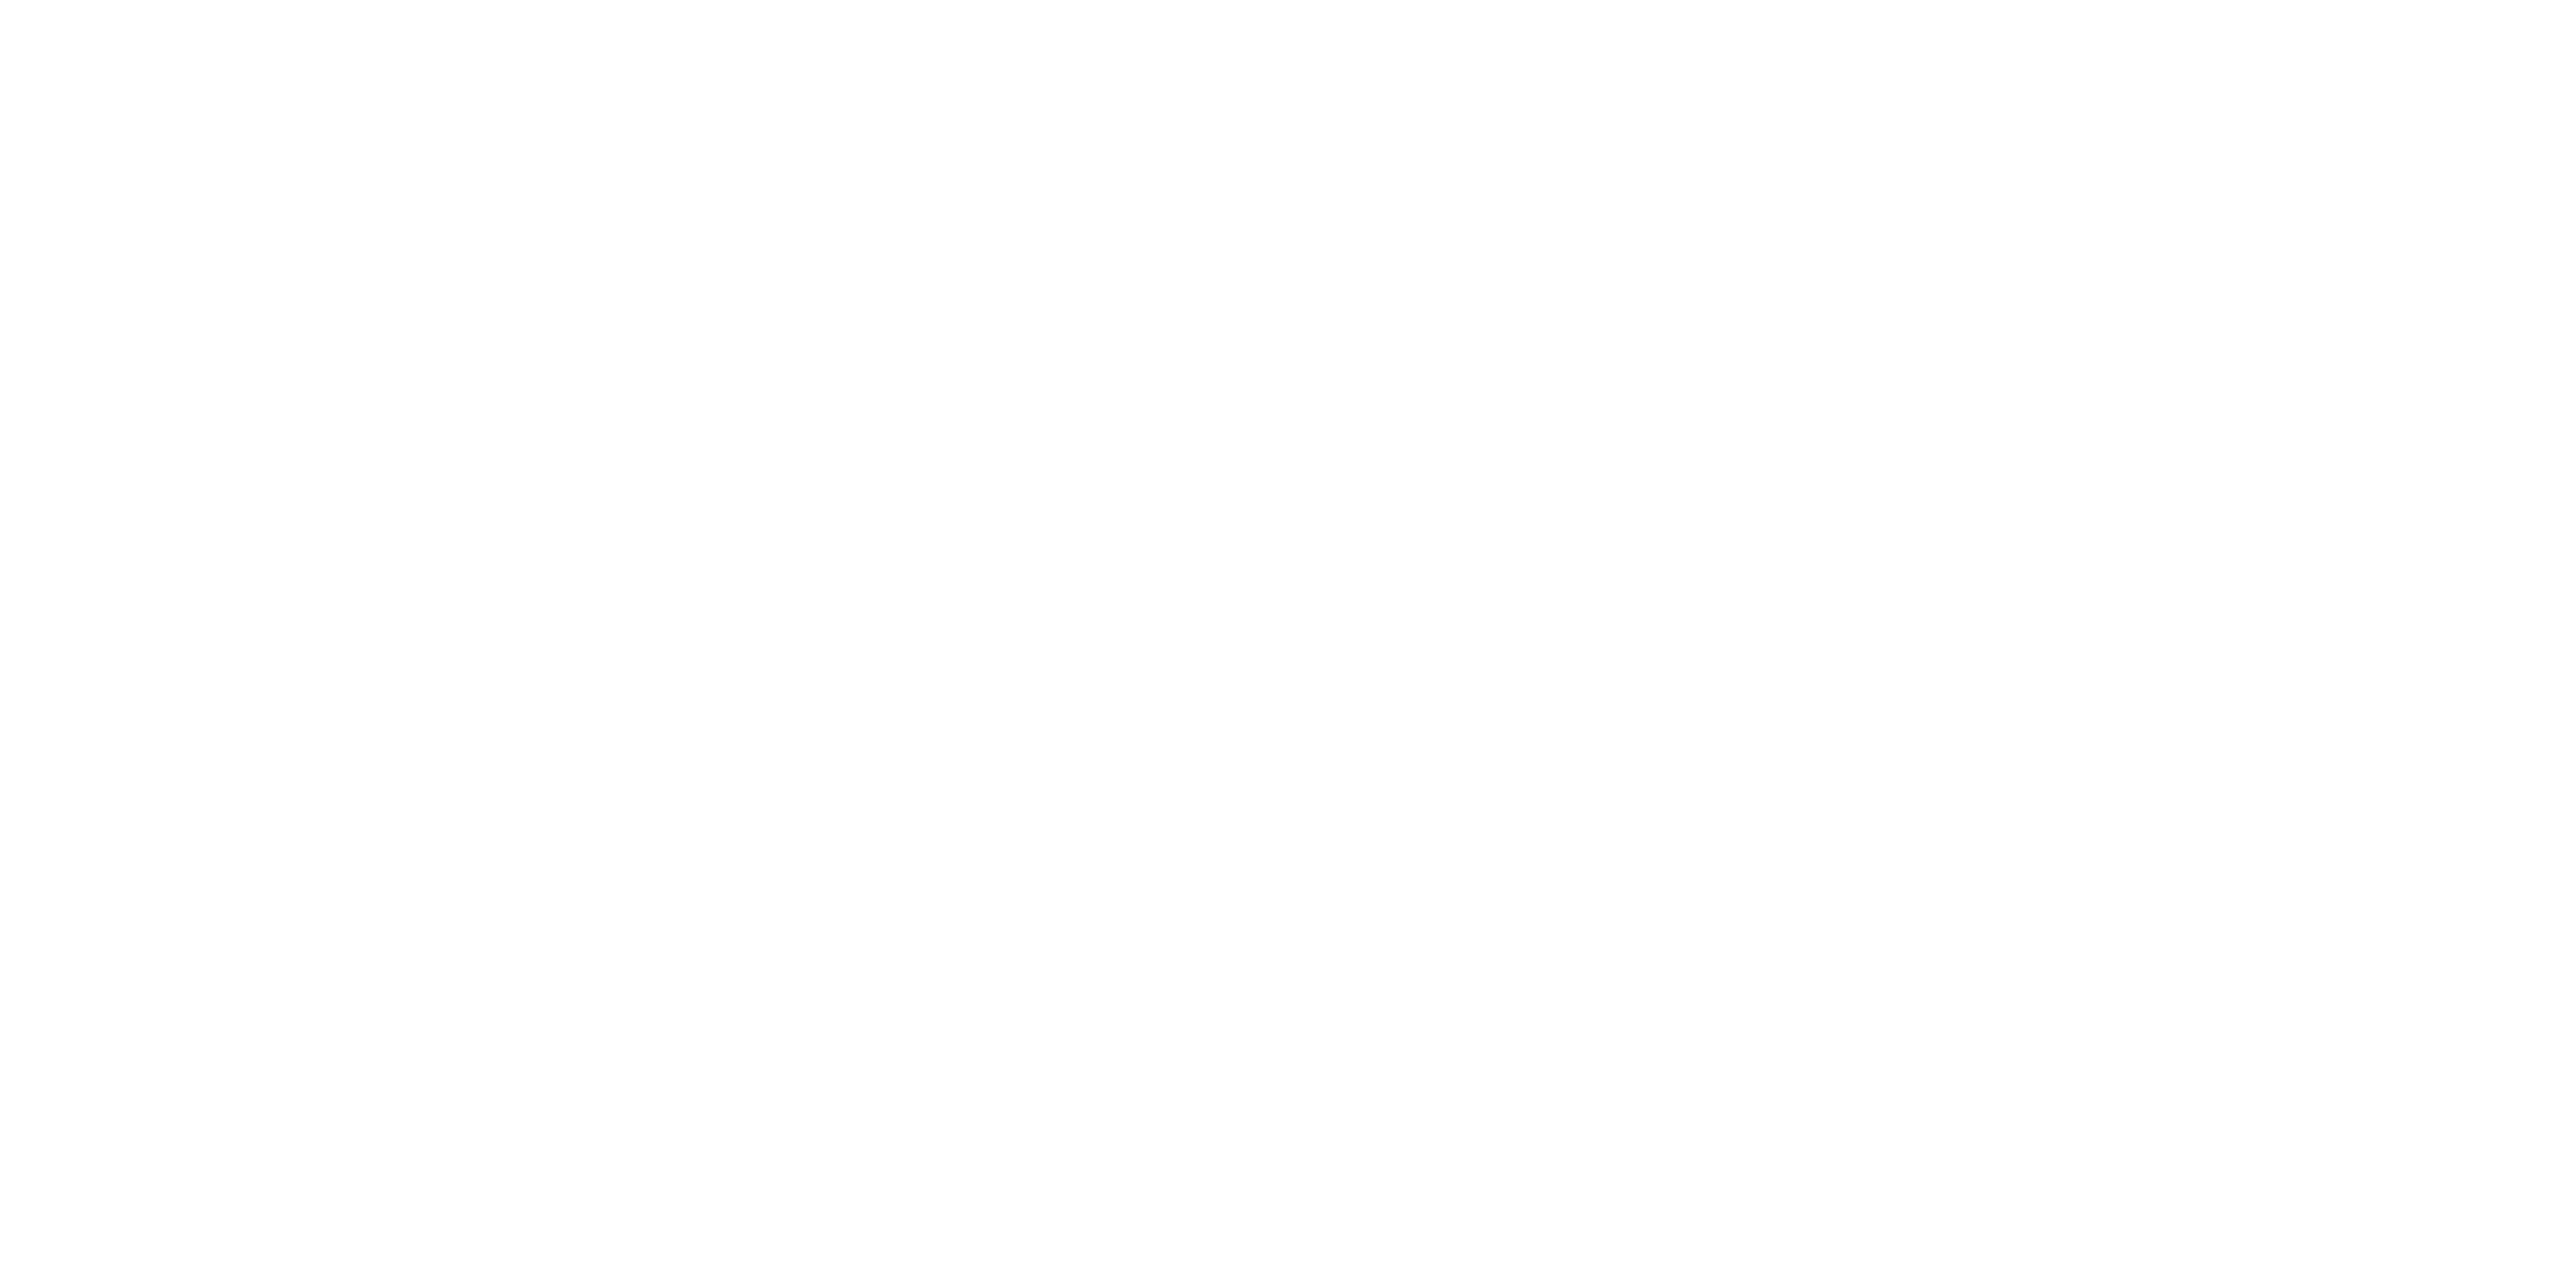

Text(0.5, 0.98, 'R200 : Filtered circular beam')

<IPython.core.display.Javascript object>


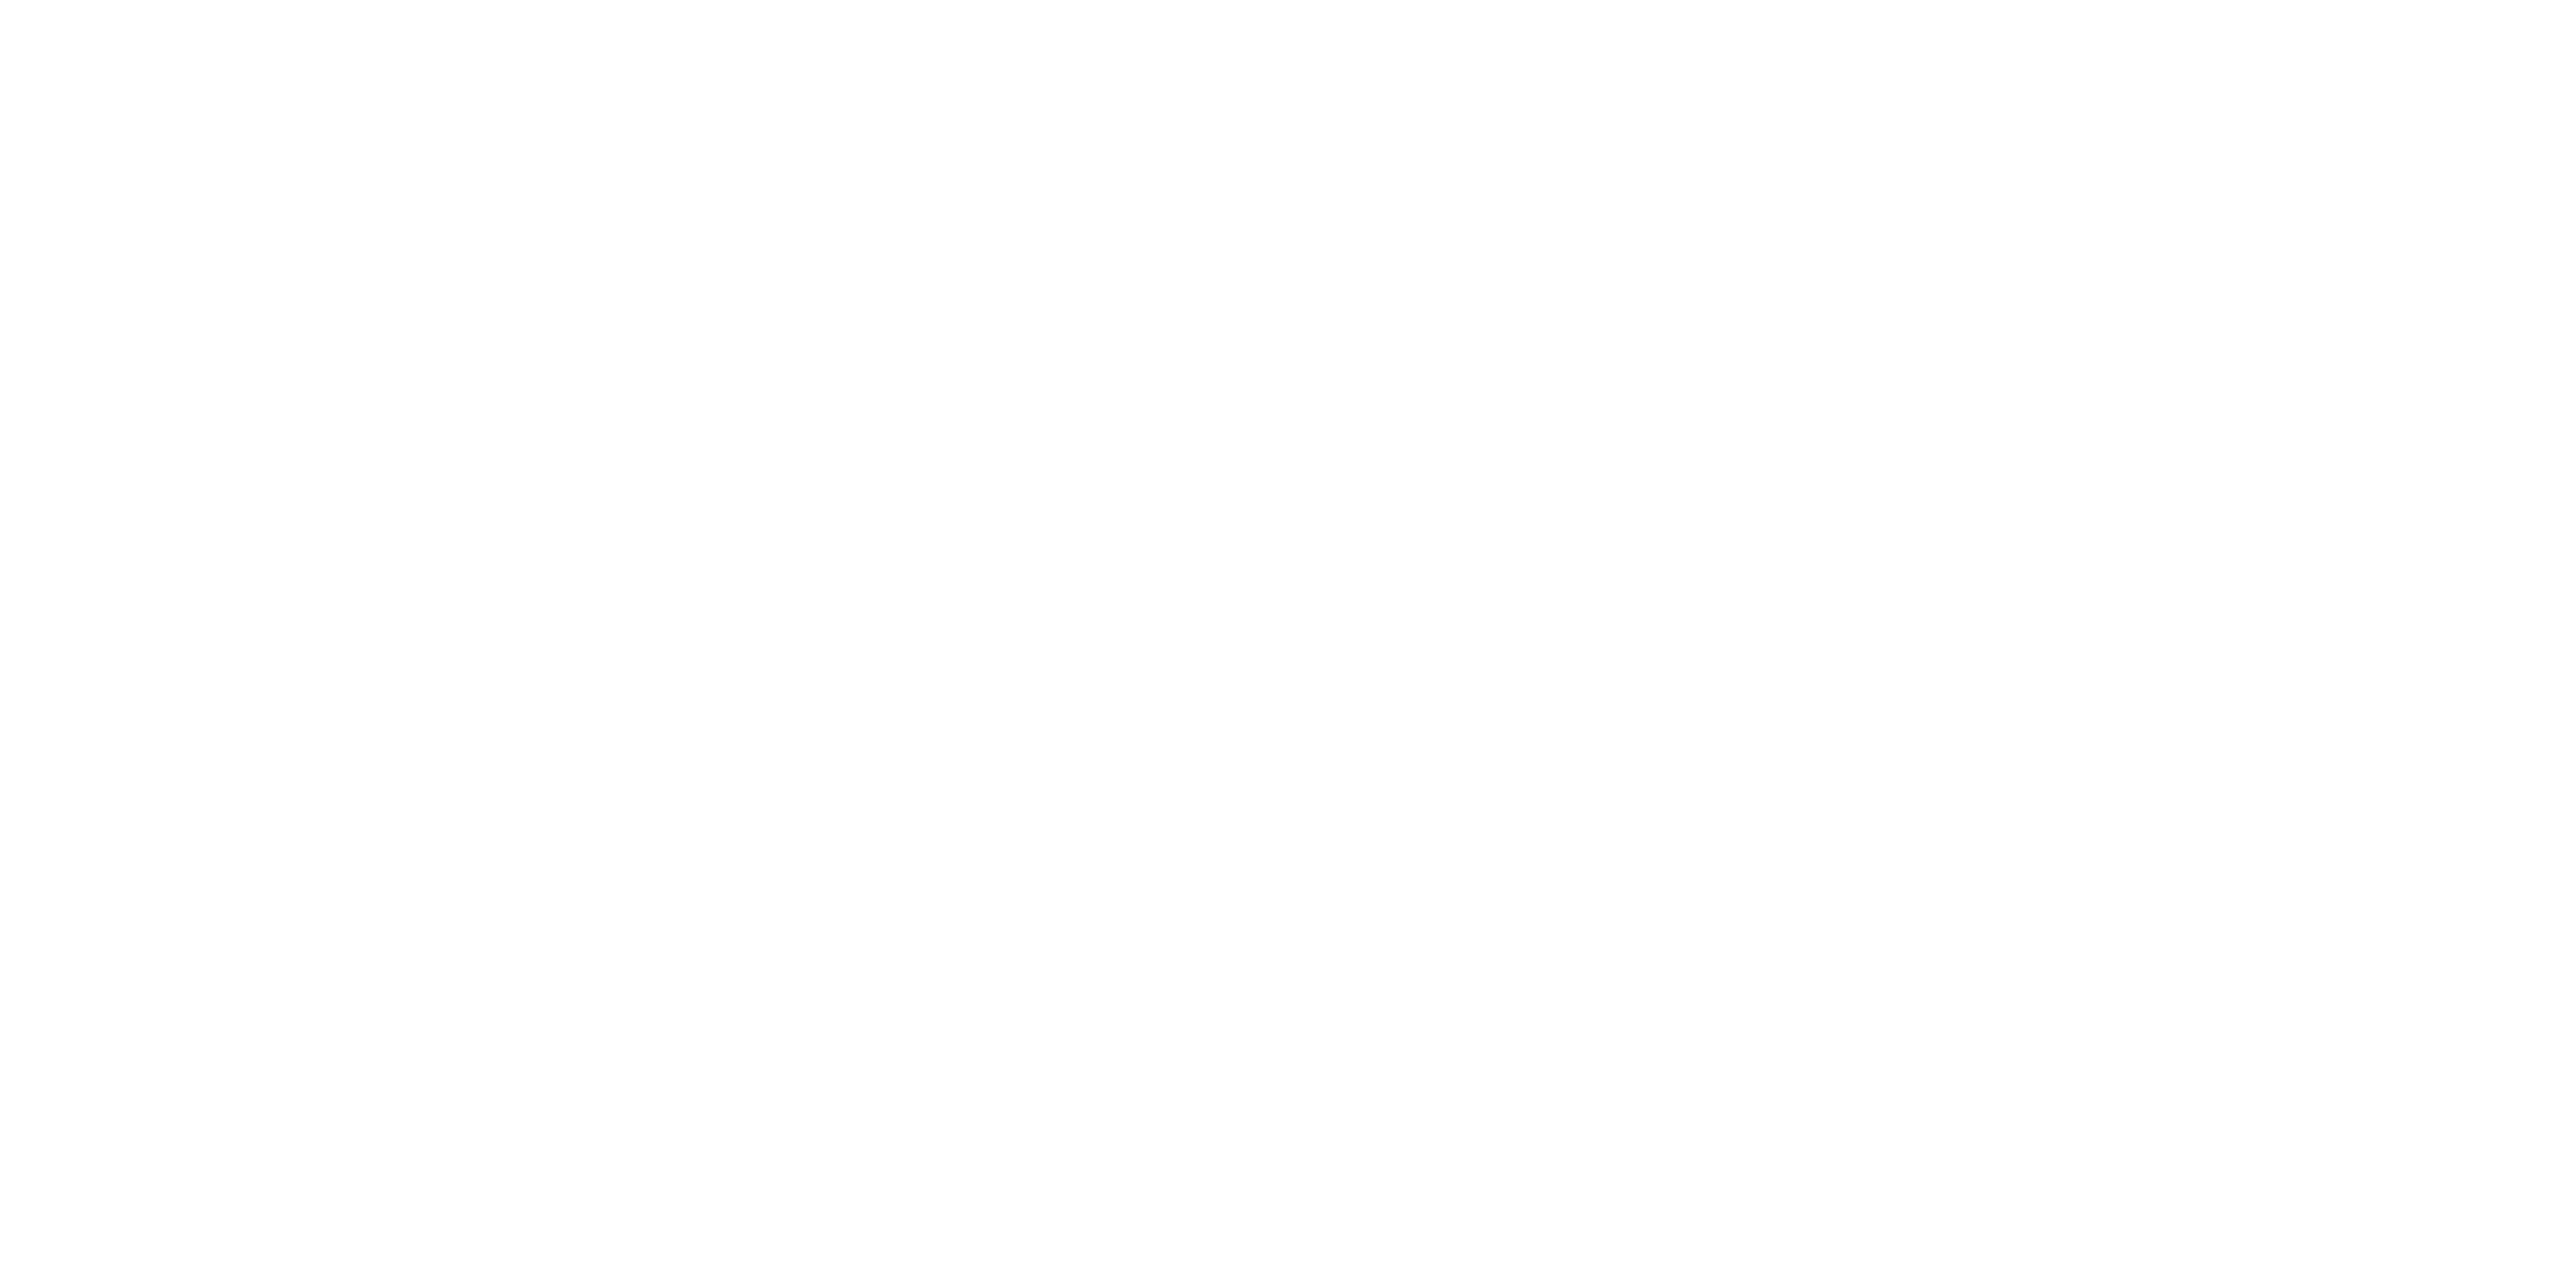

In [348]:
f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(18,9),sharex=True,sharey=True)
df_filter.plot.scatter(x="X0", y="Y0",c="DarkBlue",marker="o",ax=ax1)
ax1.set_aspect("equal")
ax1.grid()

q = ax2.quiver(df_filter["X0"], df_filter["Y0"], df_filter["U0"], df_filter["V0"],color="red")
ax2.set_aspect("equal")
ax2.set_xlabel("X0 (mm)")
ax2.grid()

plt.suptitle("R200 : Filtered circular beam")

## Read R350

In [349]:
input_R350 = pd.ExcelFile(rayfile_R350)
df_R350 = input_R350.parse(index_row=0,header=1)
df_R350=df_R350.iloc[0:NBTOT]

In [350]:
df_R350

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,8.28509,0.03142,80.0,0,0.0,8.28509,0.03142,80,OK,3.0
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,8.26662,0.02923,80.0,0,0.0,8.26662,0.02923,80,OK,3.0
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,8.24951,0.02707,80.0,0,0.0,8.24951,0.02707,80,OK,3.0
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,8.23371,0.02491,80.0,0,0.0,8.23371,0.02491,80,OK,3.0
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,8.21925,0.02276,80.0,0,0.0,8.21925,0.02276,80,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,21.59873,-0.13376,80.0,0,0.0,21.59873,-0.13376,80,OK,3.0
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,21.51529,-0.12756,80.0,0,0.0,21.51529,-0.12756,80,OK,3.0
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,21.43600,-0.12143,80.0,0,0.0,21.43600,-0.12143,80,OK,3.0
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,21.36083,-0.11535,80.0,0,0.0,21.36083,-0.11535,80,OK,3.0


In [351]:
X0C,Y0C,RMAX=GetBeamParam(df_R350)

In [352]:
df_filter=df_R350.copy()
df_filter=df_filter.loc[df_filter.apply(Select_Beam, axis=1)]
df_filter=df_filter.reset_index()   # reset index
df_R350=df_filter.copy()

<IPython.core.display.Javascript object>


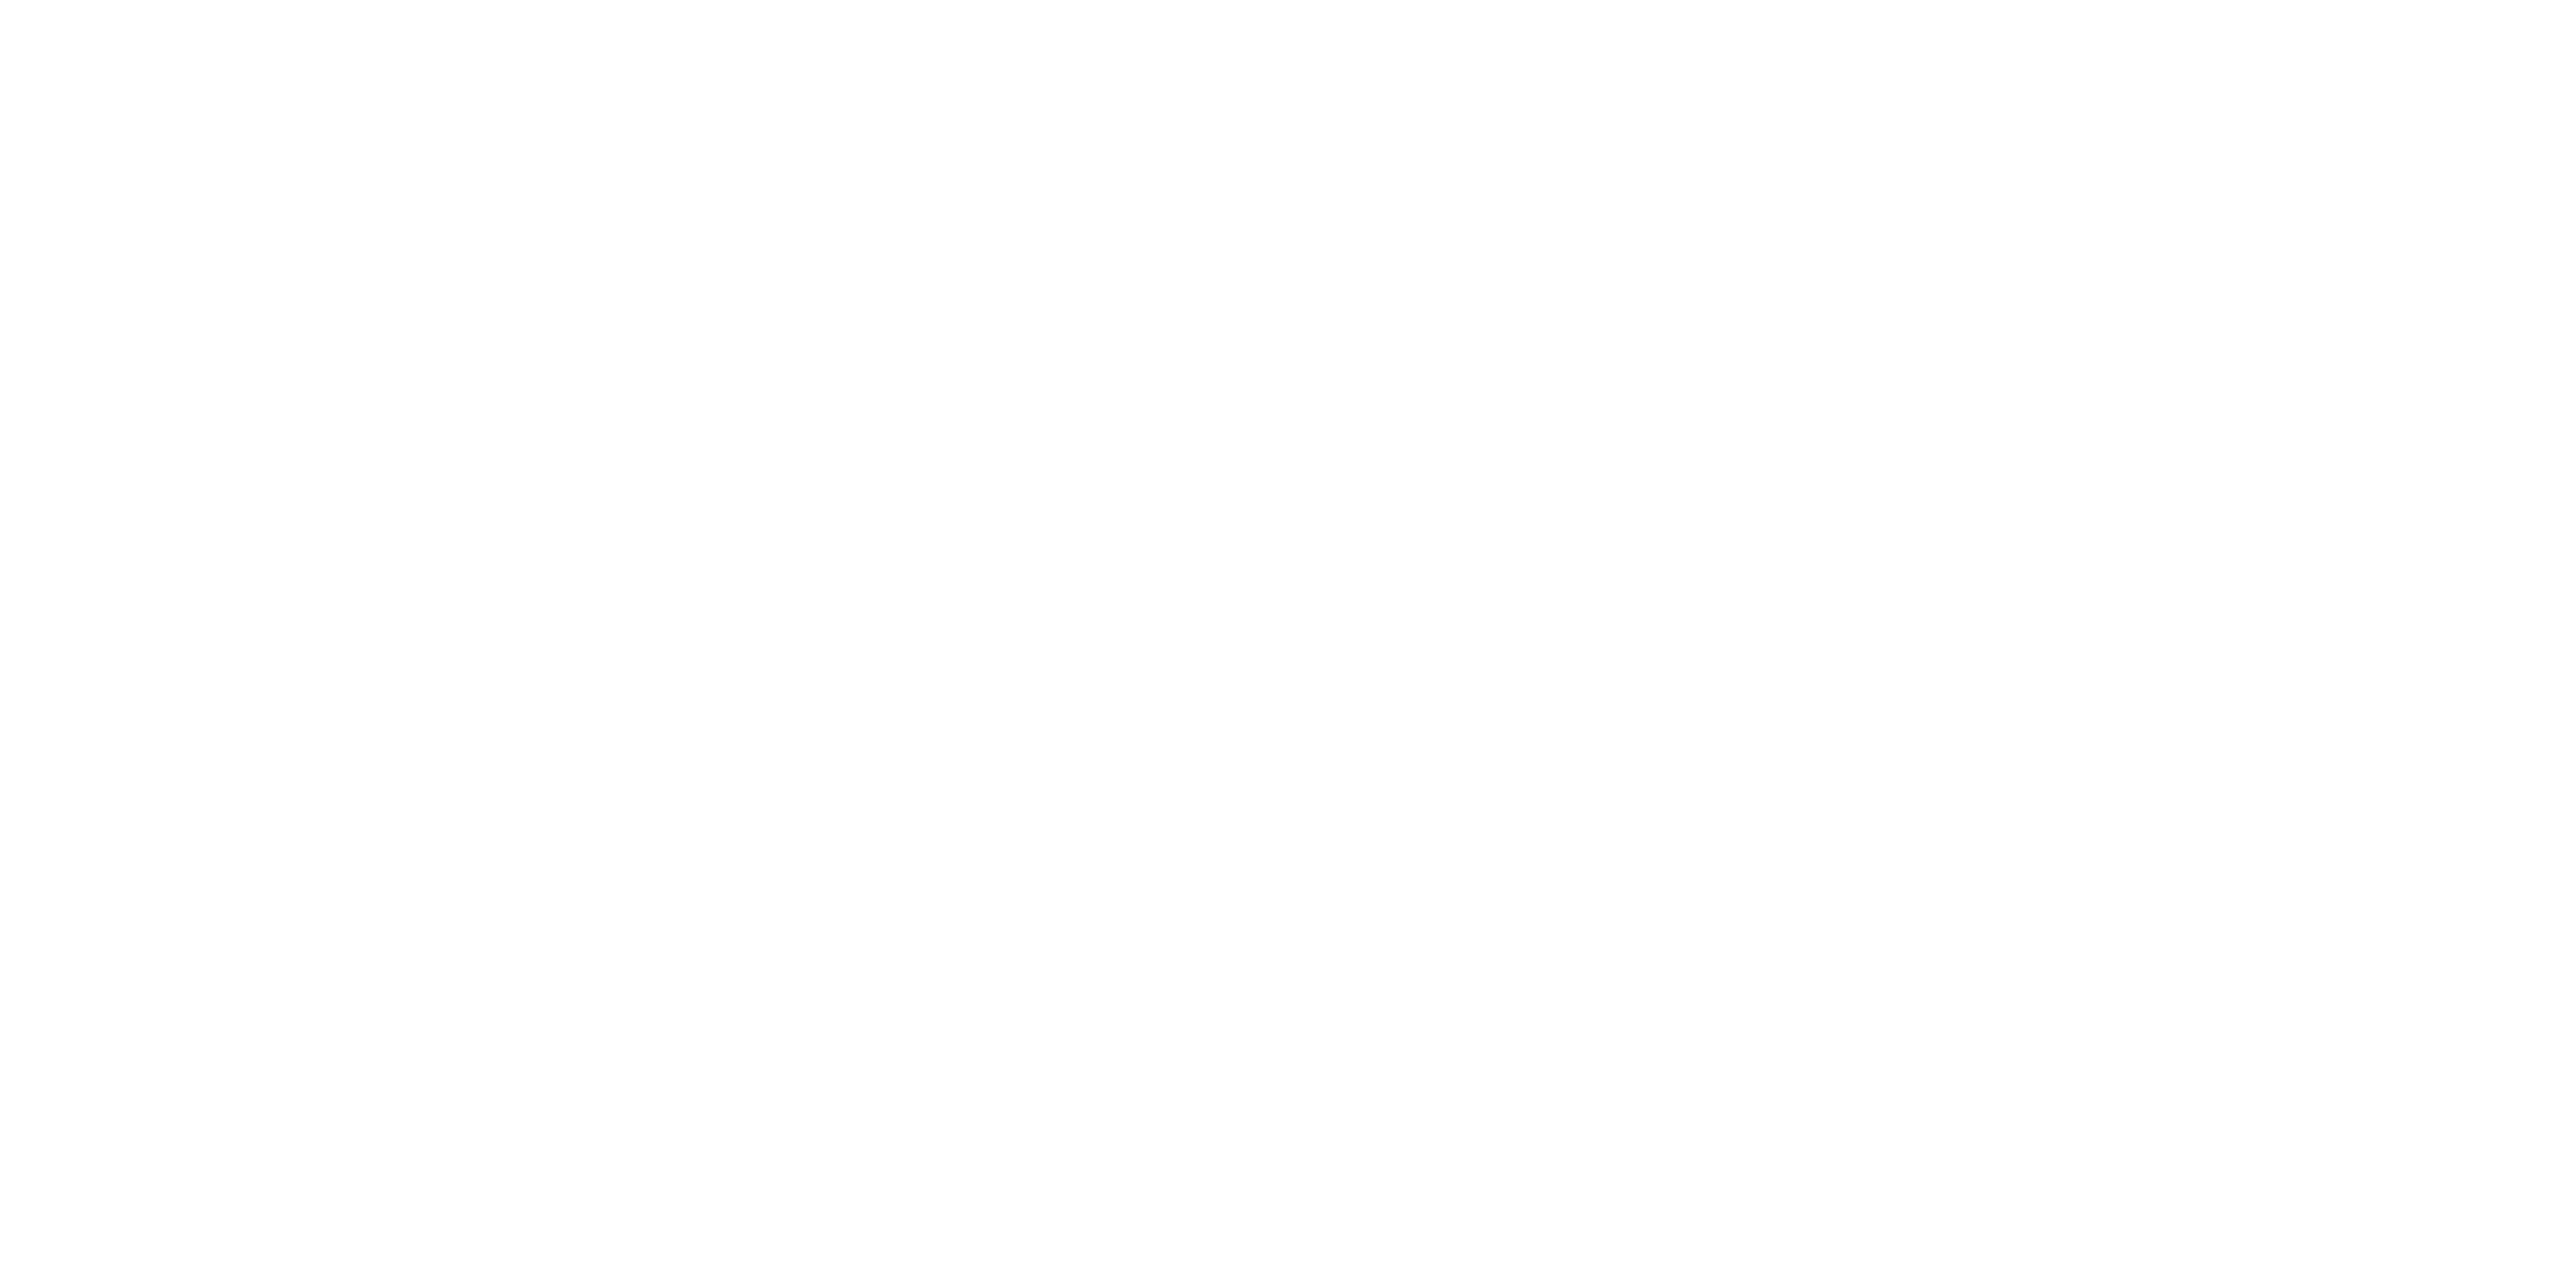

Text(0.5, 0.98, 'R350 : Filtered circular beam')

<IPython.core.display.Javascript object>


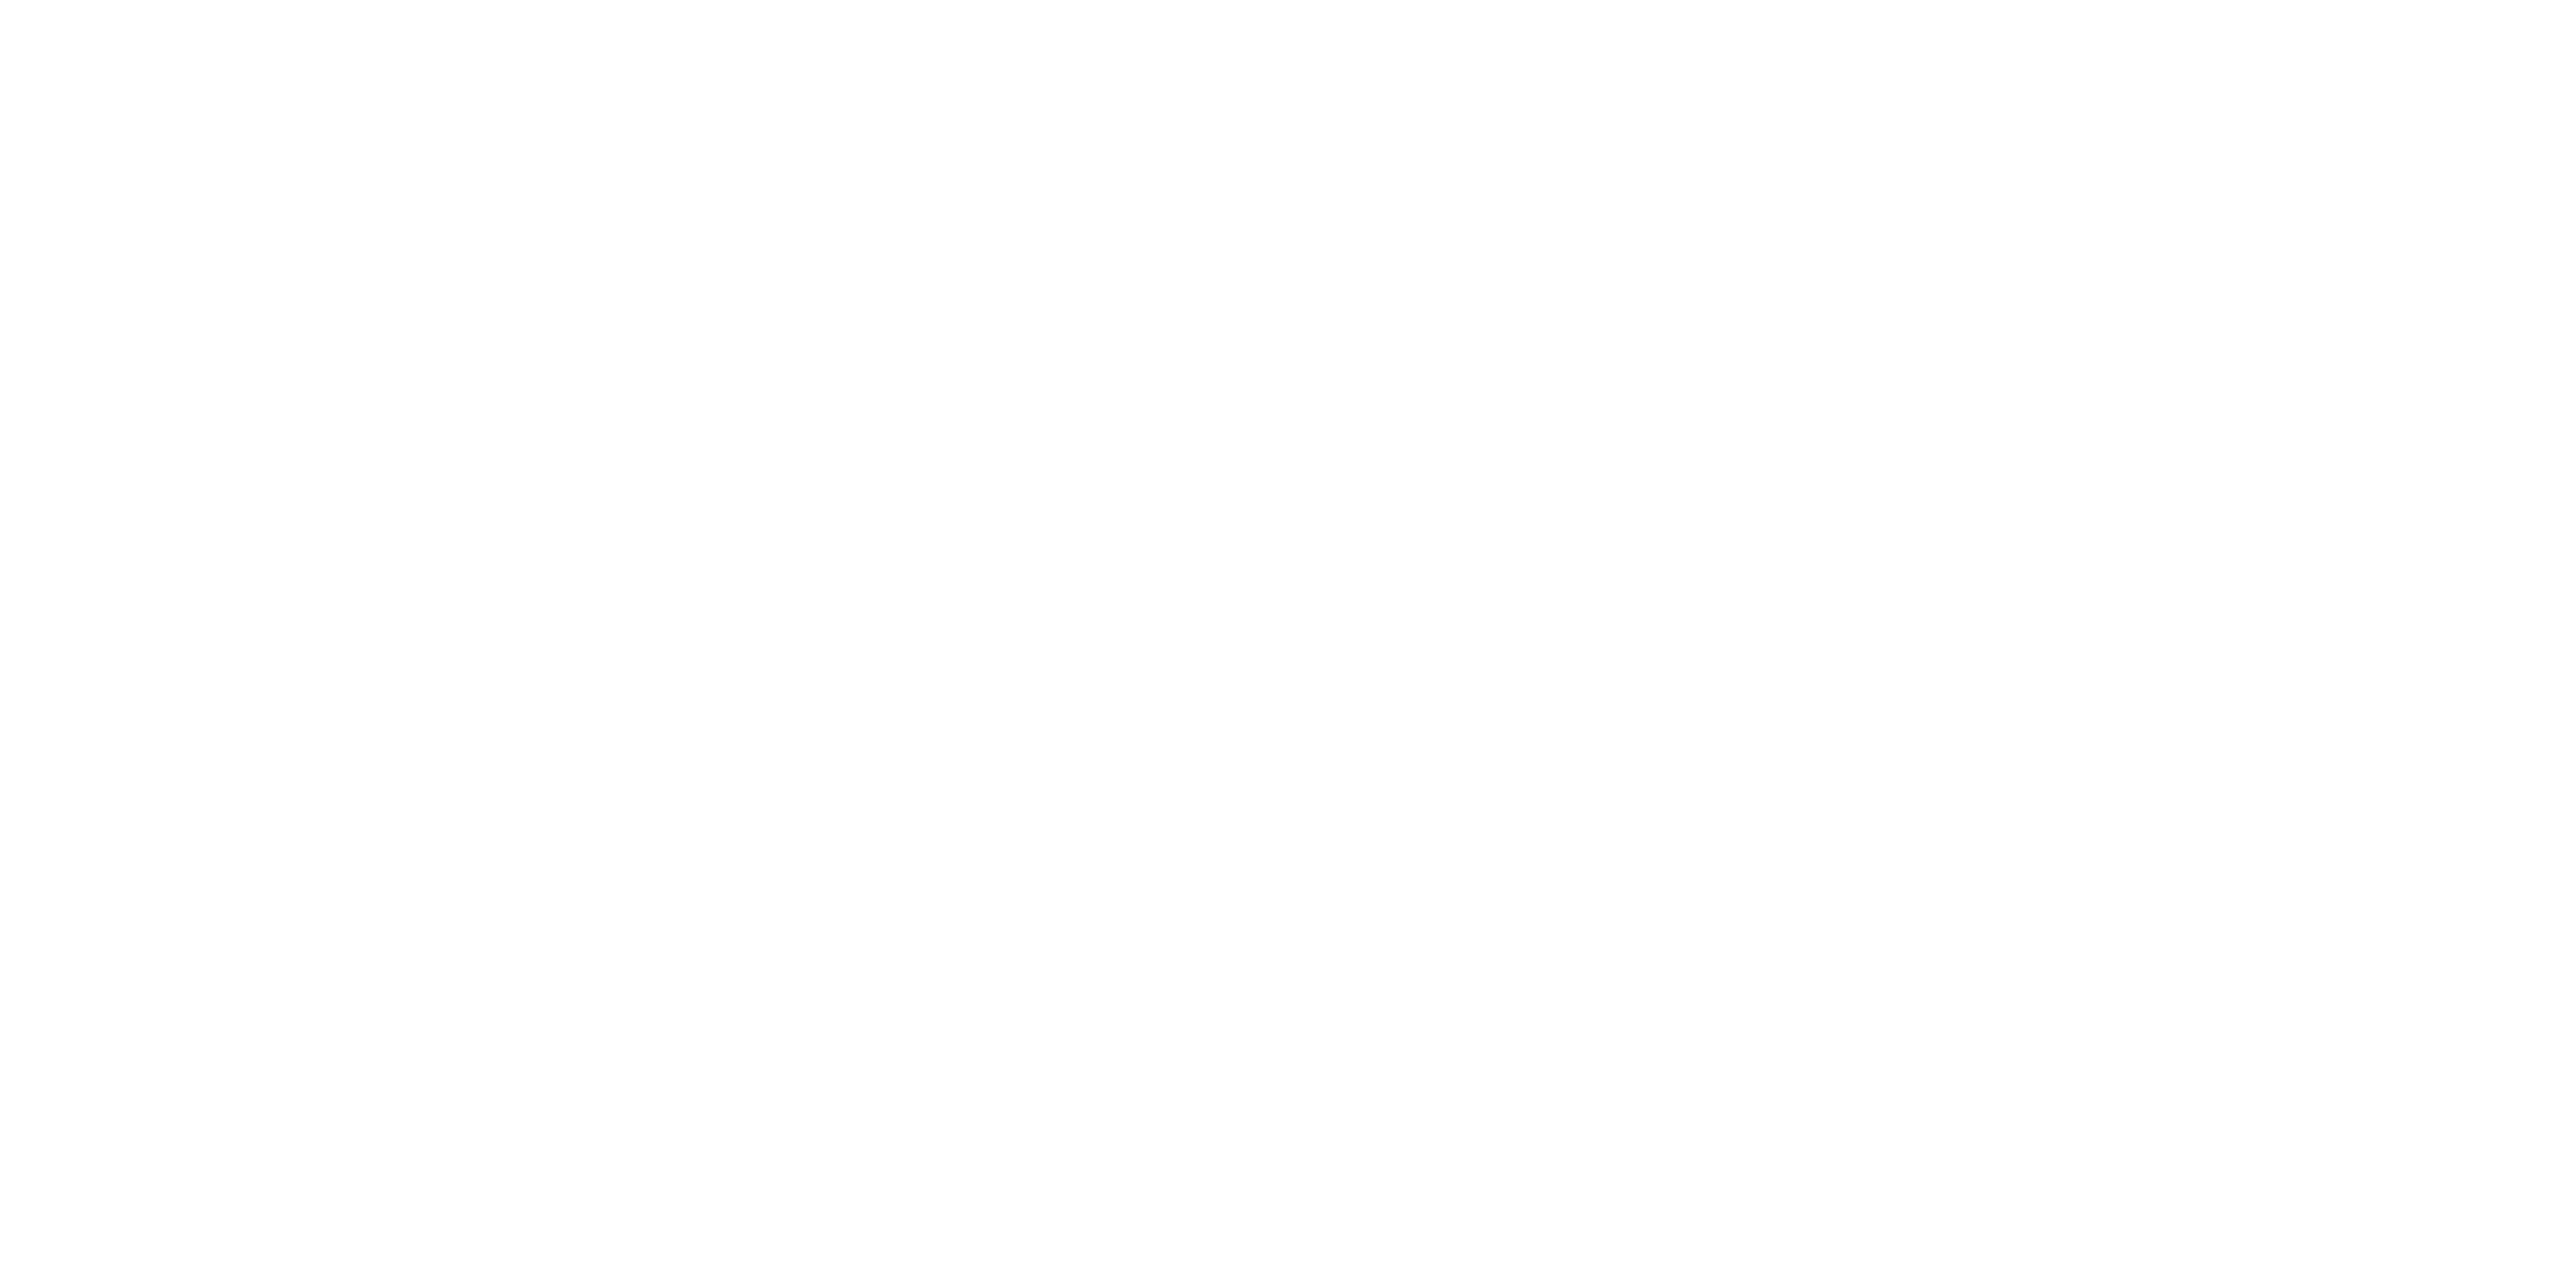

In [353]:
f, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(18,9),sharex=True,sharey=True)
df_filter.plot.scatter(x="X0", y="Y0",c="DarkBlue",marker="o",ax=ax1)
ax1.set_aspect("equal")
ax1.grid()

q = ax2.quiver(df_filter["X0"], df_filter["Y0"], df_filter["U0"], df_filter["V0"],color="red")
ax2.set_aspect("equal")
ax2.set_xlabel("X0 (mm)")
ax2.grid()

plt.suptitle("R350 : Filtered circular beam")

# Draw beam

In [354]:
ColorDict = {0.0004:"b",0.0006:"g",0.0008:"r",0.001:"k"}  # map wl --> color character
WLIndexDict = {0:0.0004,1:0.0006,2:0.0008,3:0.001}        # map index --> wl in mm
ColorNum = ["b","g","r","k"]
WLARRAY = np.array([0.0004,0.0006,0.0008,0.001])

In [355]:
def GetRayConvergence(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1,XMIN=0,XMAX=100,YMIN=0,YMAX=100):
    """
    Compute convergence of upper, lower and central ray in 2D plane (X,Y)
    input:
      # play with the converging part of the beam
      # do not use the scattering predicted by BeamFour
      # use the grating equation here to predict the scattering angle
      (x0,y0) : coordinate of central ray usually (0,0)
      (u0,v0) : vector director coordinate of central ray (usually  (1,0) )
      (u1,v1) : vector director coordinate of upper ray (usually  u1>0 v1<0)
      (u2,v2) : vector director coordinate of lower ray (usually  u2>0 v2<0)
      (x0,y1) : upper ray coordinate at disperser   y1>0
      (x0,y2) : lower ray coordinate at disperser  usually y2=-y1 <0
      a : grating spacing in mm
      wl : wavelength in mm
      m : order
      all units are in mm
    
    """
    #assert u0**2+v0**2==1
    #assert u1**2+v1**2==1
    #assert u2**2+v2**2==1
    
    # angles with respect to horizontal line
    theta0=np.arcsin(v0+m*wl/a)
    theta1=np.arcsin(v1+m*wl/a)
    theta2=np.arcsin(v2+m*wl/a)
    
    XX=np.linspace(XMIN,XMAX,50)
    
    YY0=y0+np.tan(theta0)*(XX-x0)
    YY1=y1+np.tan(theta1)*(XX-x0)
    YY2=y2+np.tan(theta2)*(XX-x0)
    
    return XX,YY0,YY1,YY2
    

In [356]:
def GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1):
    """
    Compute convergence intersection of upper, lower and central ray in 2D plane (X,Y)
    input:
      # play with the converging part of the beam
      # do not use the scattering predicted by BeamFour
      # use the grating equation here to predict the scattering angle
      (x0,y0) : coordinate of central ray usually (0,0)
      (u0,v0) : vector director coordinate of central ray (usually  (1,0) )
      (u1,v1) : vector director coordinate of upper ray (usually  u1>0 v1<0)
      (u2,v2) : vector director coordinate of lower ray (usually  u2>0 v2<0)
      (x0,y1) : upper ray coordinate at disperser   y1>0
      (x0,y2) : lower ray coordinate at disperser  usually y2=-y1 <0
      a : grating spacing in mm
      wl : wavelength in mm
      m : order
      all units are in mm
    
    """
    #assert u0**2+v0**2==1
    #assert u1**2+v1**2==1
    #assert u2**2+v2**2==1
    
    # angles with respect to horizontal line
    theta0=np.arcsin(v0+m*wl/a)
    theta1=np.arcsin(v1+m*wl/a)
    theta2=np.arcsin(v2+m*wl/a)
    

    dx=(y1-y2)/(np.tan(theta2)-np.tan(theta1))
    x=x0+dx
    y=y0+np.tan(theta0)*dx
    
    
    return x,y
    

In [357]:
def GetRayConvergenceIntersectionPoints(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1,WLMIN=0.,WLMAX=1200.,NBPOINTS=5000):
    """
    Give the predicted convergence curve predicted for a grating.
    It is not the true ray convergence (example bad for hologram)
    
    """
    all_wl=np.linspace(WLMIN,WLMAX,NBPOINTS)*1e-6
    
    X,Y=GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,all_wl,a,m)
       
    return X,Y

In [358]:
def GetRayConvergenceIntersectionPoints2(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1,WLMIN=0.,WLMAX=1000.,NBPOINTS=1000):
    """
    Give the predicted convergence curve predicted for a grating.
    It is not the true ray convergence (example bad for hologram)
    
    """
    all_wl=np.linspace(WLMIN,WLMAX,NBPOINTS)*1e-6
    
    X,Y=GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,all_wl,a,m)
       
    return X,Y,all_wl

In [359]:
def GetRayConvergenceIntersectionPointsCanonic(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1):
    """
    Give the convergence points at 0.4, 0.6, 0.8, 1.0
    
    """
      
    all_wl=np.array([400.,600.,800.,1000.])*1e-6
    
    X,Y=GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,all_wl,a,m)
       
    return X,Y

In [360]:
def GetCentralRay(df):
    """
    """
    central_ray=df.loc[(df["U0"]==0) & (df["X0"]==0) & (df["Y0"]==0)]
    return central_ray

In [361]:
def GetUpperRay(df):
    """
    """
    upper_ray=df.loc[(df["X0"]==df["X0"].max()) & (df["Y0"]==0)]
    return upper_ray

In [362]:
def GetLowerRay(df):
    """
    """
    lower_ray=df.loc[(df["X0"]==df["X0"].min()) & (df["Y0"]==0)]
    return lower_ray

In [363]:
def GetScatteredBeamConvergence(df):
    """
    Get the convergence for each wavelength calculated from scattered rays
    
    input
       df : Beam Dataframe
    output :
       arrays of (X,Y) convergence position for each wavelength 
    """
    
    # extract the three main rays of the beam
    central_ray=GetCentralRay(df)
    upper_ray=GetUpperRay(df)
    lower_ray=GetLowerRay(df)
    
    # extract coordinates of scattered beams
    xc_1=central_ray["Z2"].values
    yc_1=central_ray["X2"].values
    
    xc_2=central_ray["Z3"].values
    yc_2=central_ray["X3"].values
    
    
   
    xup_1=upper_ray["Z2"].values
    yup_1=upper_ray["X2"].values
    
    xup_2=upper_ray["Z3"].values
    yup_2=upper_ray["X3"].values
    
    aup=(yup_2-yup_1)/(xup_2-xup_1)  # slope of upper ray 
    
    
    xlo_1=lower_ray["Z2"].values
    ylo_1=lower_ray["X2"].values
    
    xlo_2=lower_ray["Z3"].values
    ylo_2=lower_ray["X3"].values
    
    alo=(ylo_2-ylo_1)/(xlo_2-xlo_1)  # slope of upper ray 
    
    # compute intersection of scattered upper and lower ray
    
    da=aup-alo   # difference of slopes
    
    x_I= -(yup_1-ylo_1)/da + (aup*xup_1 -alo*xlo_1)/da
    y_I=aup*(x_I-xup_1)+yup_1
    
    return x_I,y_I
    
    

## Ronchi 400

### central ray

In [364]:
central_ray=GetCentralRay(df_R400)

In [365]:
central_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
40,60,0.0,0.0,0,0.0,0.0,1.0,0.0004,b,0.0,...,9.40111,0.0,80,0,0,9.40111,0.0,80,OK,3
121,181,0.0,0.0,0,0.0,0.0,1.0,0.0006,g,0.0,...,14.33909,0.0,80,0,0,14.33909,0.0,80,OK,3
202,302,0.0,0.0,0,0.0,0.0,1.0,0.0008,r,0.0,...,19.59010,0.0,80,0,0,19.59010,0.0,80,OK,3
283,423,0.0,0.0,0,0.0,0.0,1.0,0.0010,k,0.0,...,25.31328,0.0,80,0,0,25.31328,0.0,80,OK,3


In [366]:
R0C_R400=central_ray.mean()["Z3"]-central_ray.mean()["Z2"]
X0C_R400=central_ray.mean()["Z1"]-central_ray.mean()["Z3"]
Y0C_R400=0

In [367]:
R0C_R400

58.0

### The upper ray

In [368]:
upper_ray=GetUpperRay(df_R400)

In [369]:
upper_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
45,65,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0004,b,2.106694,...,9.33769,0.0,80,0,0,9.33769,0.0,80,OK,3
126,186,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0006,g,2.106694,...,14.17668,0.0,80,0,0,14.17668,0.0,80,OK,3
207,307,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0008,r,2.106694,...,19.27116,0.0,80,0,0,19.27116,0.0,80,OK,3
288,428,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0010,k,2.106694,...,24.76065,0.0,80,0,0,24.76065,0.0,80,OK,3


### The lowest ray

In [370]:
lower_ray=GetLowerRay(df_R400)

In [371]:
lower_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
35,55,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0004,b,-2.106694,...,9.50243,0.0,80,0,0,9.50243,0.0,80,OK,3
116,176,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0006,g,-2.106694,...,14.56329,0.0,80,0,0,14.56329,0.0,80,OK,3
197,297,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0008,r,-2.106694,...,20.00213,0.0,80,0,0,20.00213,0.0,80,OK,3
278,418,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0010,k,-2.106694,...,26.00332,0.0,80,0,0,26.00332,0.0,80,OK,3


### Plot Ronchi 400 with spherical front surface

<IPython.core.display.Javascript object>


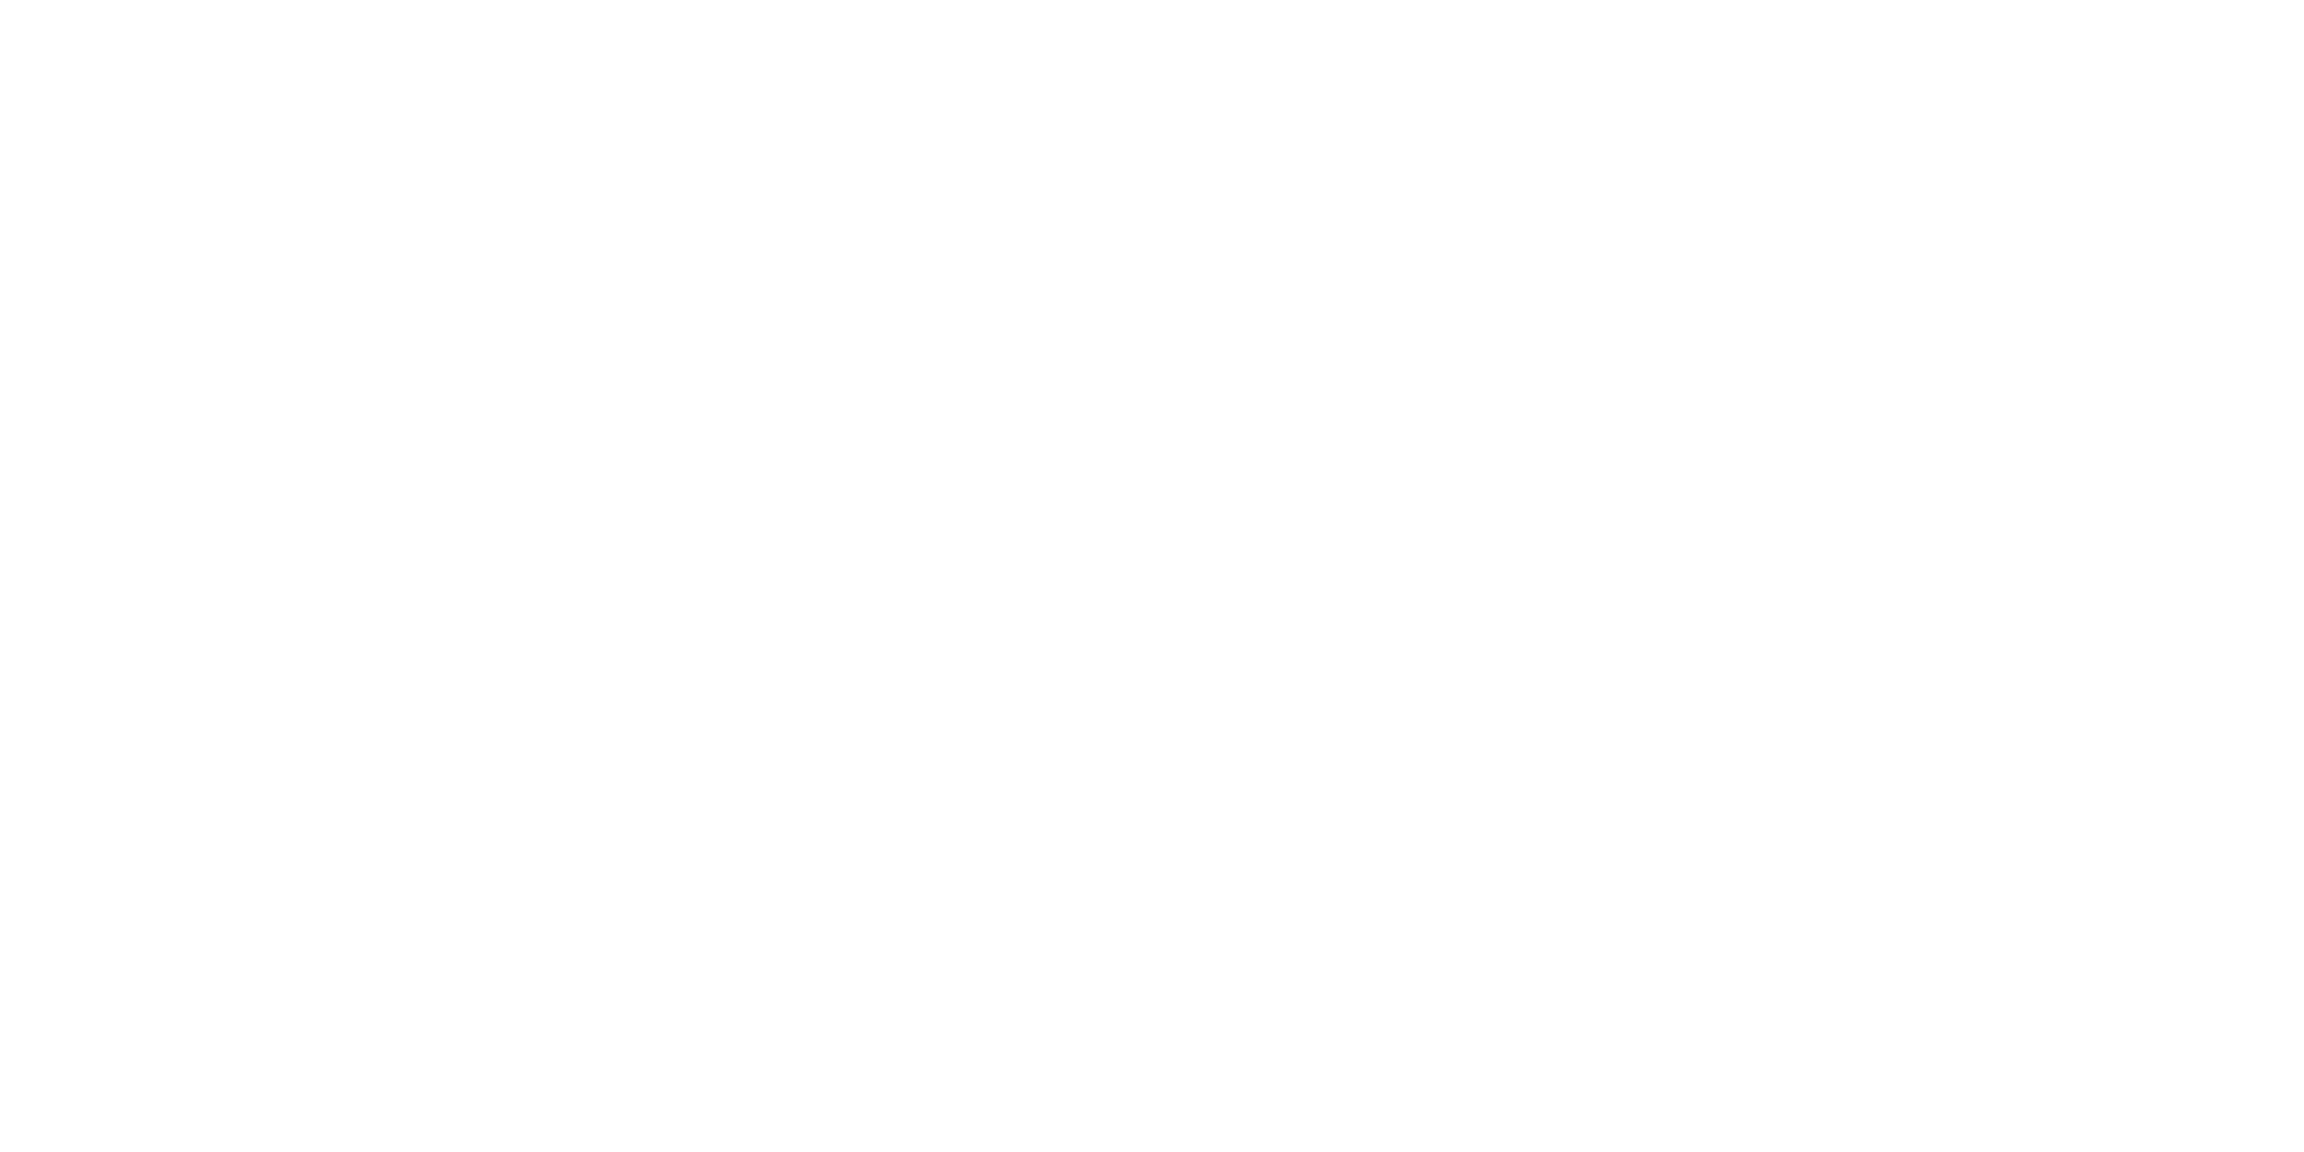

Text(0, 0.5, 'X (mm)')

<IPython.core.display.Javascript object>


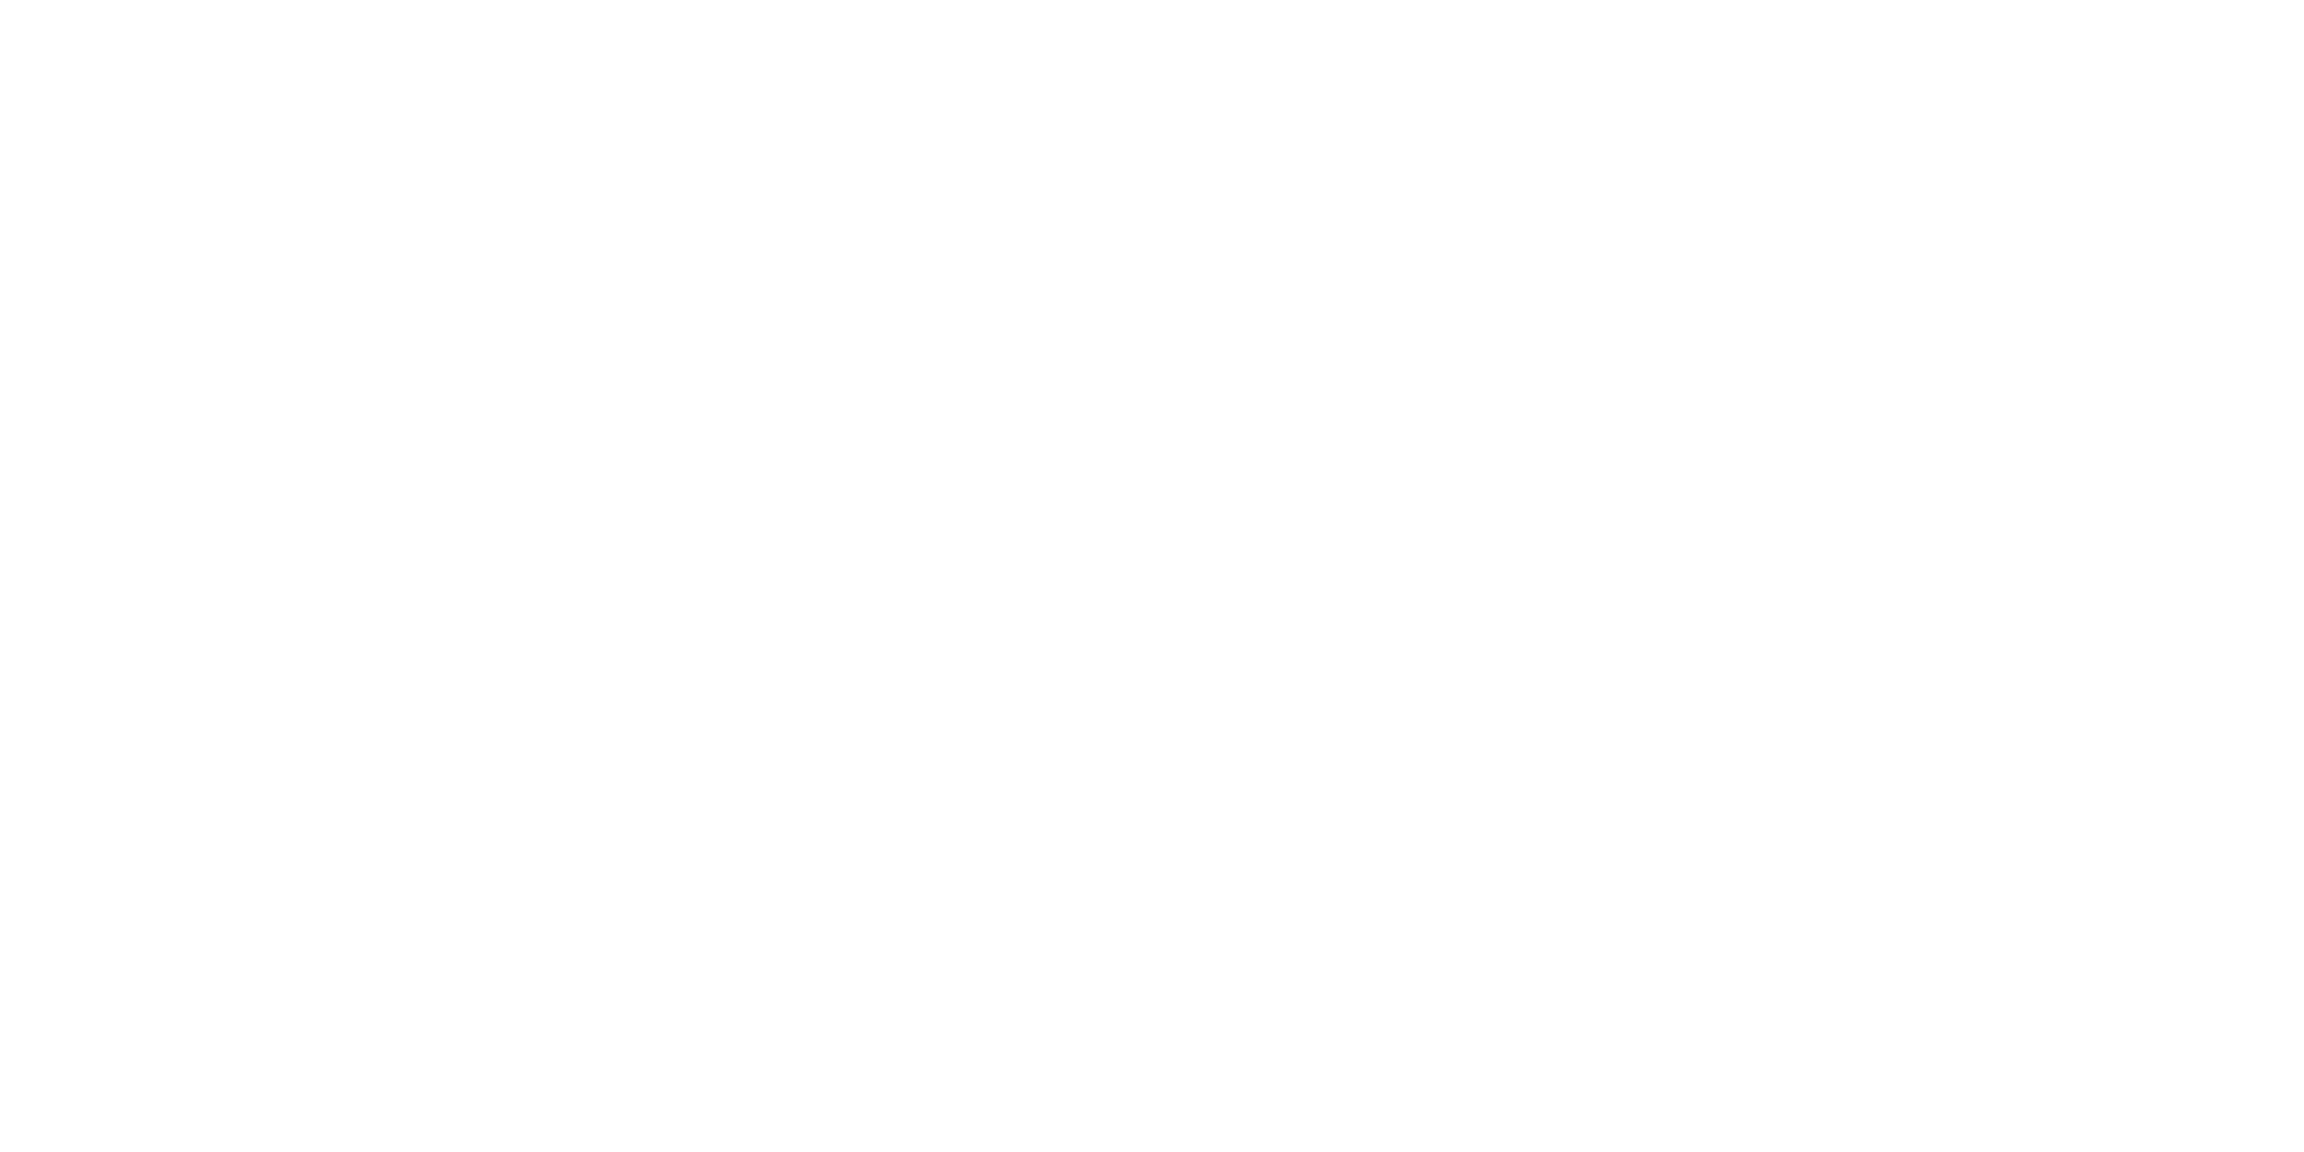

In [372]:
#fig=plt.figure(figsize=(16,8))
fig,ax = plt.subplots(figsize=(16,8))

for index, row in df_R400.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    if Y0==0:
        ax.plot([Z0,Z1],[X0,X1],"-",color=col)
        ax.plot([Z1,Z2],[X1,X2],"-",color=col)
        ax.plot([Z2,Z3],[X2,X3],"-",color=col)
        
ellipse = mpl.patches.Ellipse(xy=(X0C_R400, Y0C_R400), width=2*R0C_R400, height=2*R0C_R400,angle=1,color="grey",fill=False)        

fig.gca().add_artist(ellipse)


ax.grid()
ax.set_xlim(-70,0)
ax.set_ylim(-10,30)
ax.set_title("Ronchi 400")   
ax.set_xlabel("Z (mm)")
ax.set_ylabel("X (mm)")    

### Grating equation

#### Ronchi 400

In [373]:
a=1./400.

In [374]:
idx_wl=3
thewl=WLIndexDict[idx_wl] 

In [375]:
central_ray_wl=central_ray.iloc[idx_wl]
central_ray_wl

index              423
X0                   0
Y0                   0
Z0                   0
U0                   0
V0                   0
W0                   1
wave             0.001
col                  k
X1                   0
Y1                   0
Z1                  21
X2                   0
Y2                   0
Z2                  22
X3             25.3133
Y3                   0
Z3                  80
Xgoal                0
Ygoal                0
Xfinal         25.3133
Yfinal               0
Zfinal              80
Notes               OK
Unnamed: 23          3
Name: 283, dtype: object

In [376]:
upper_ray_wl=upper_ray.iloc[idx_wl]
upper_ray_wl

index               428
X0              2.85654
Y0                    0
Z0                    0
U0            -0.035684
V0                    0
W0             0.999363
wave              0.001
col                   k
X1              2.10669
Y1                    0
Z1                   21
X2              2.07099
Y2                    0
Z2                   22
X3              24.7606
Y3                    0
Z3                   80
Xgoal                 0
Ygoal                 0
Xfinal          24.7606
Yfinal                0
Zfinal               80
Notes                OK
Unnamed: 23           3
Name: 288, dtype: object

In [377]:
lower_ray_wl=lower_ray.iloc[idx_wl]

In [378]:
lower_ray_wl

index               418
X0             -2.85654
Y0                    0
Z0                    0
U0             0.035684
V0                    0
W0             0.999363
wave              0.001
col                   k
X1             -2.10669
Y1                    0
Z1                   21
X2             -2.07099
Y2                    0
Z2                   22
X3              26.0033
Y3                    0
Z3                   80
Xgoal                 0
Ygoal                 0
Xfinal          26.0033
Yfinal                0
Zfinal               80
Notes                OK
Unnamed: 23           3
Name: 278, dtype: object

In [379]:
x0=0
y0=central_ray_wl["X0"]
u0=central_ray_wl["W0"]
v0=central_ray_wl["U0"]

y1=upper_ray_wl["X2"]
u1=upper_ray_wl["W0"]
v1=upper_ray_wl["U0"]

y2=lower_ray_wl["X2"]
u2=lower_ray_wl["W0"]
v2=lower_ray_wl["U0"]

XX,YY0,YY1,YY2 = GetRayConvergence(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1)

In [380]:
XX=XX+central_ray_wl["Z2"]-central_ray_wl["Z3"]

In [381]:
theXI,theYI=GetRayConvergenceIntersectionSimple(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,wl,a,m=1)

In [382]:
theXI=theXI+central_ray_wl["Z2"]-central_ray_wl["Z3"]

In [383]:
theXI,theYI

(-13.385138662653617, 19.47152182841415)

In [384]:
XXX,YYY=GetRayConvergenceIntersectionPoints(x0,y0,u0,v0,y1,u1,v1,y2,u2,v2,a,m=1,WLMIN=0.,WLMAX=1500.,NBPOINTS=5000)

In [385]:
XXX=XXX+central_ray_wl["Z2"]-central_ray_wl["Z3"]

In [386]:
XI,YI=GetScatteredBeamConvergence(df_R400)

In [387]:
XI=XI-central_ray_wl["Z3"]

In [388]:
XI

array([ -2.2186072 ,  -4.95151471,  -8.70032732, -13.38524509])

In [389]:
YI

array([ 9.05972529, 13.14320583, 16.69103743, 19.52432827])

<IPython.core.display.Javascript object>


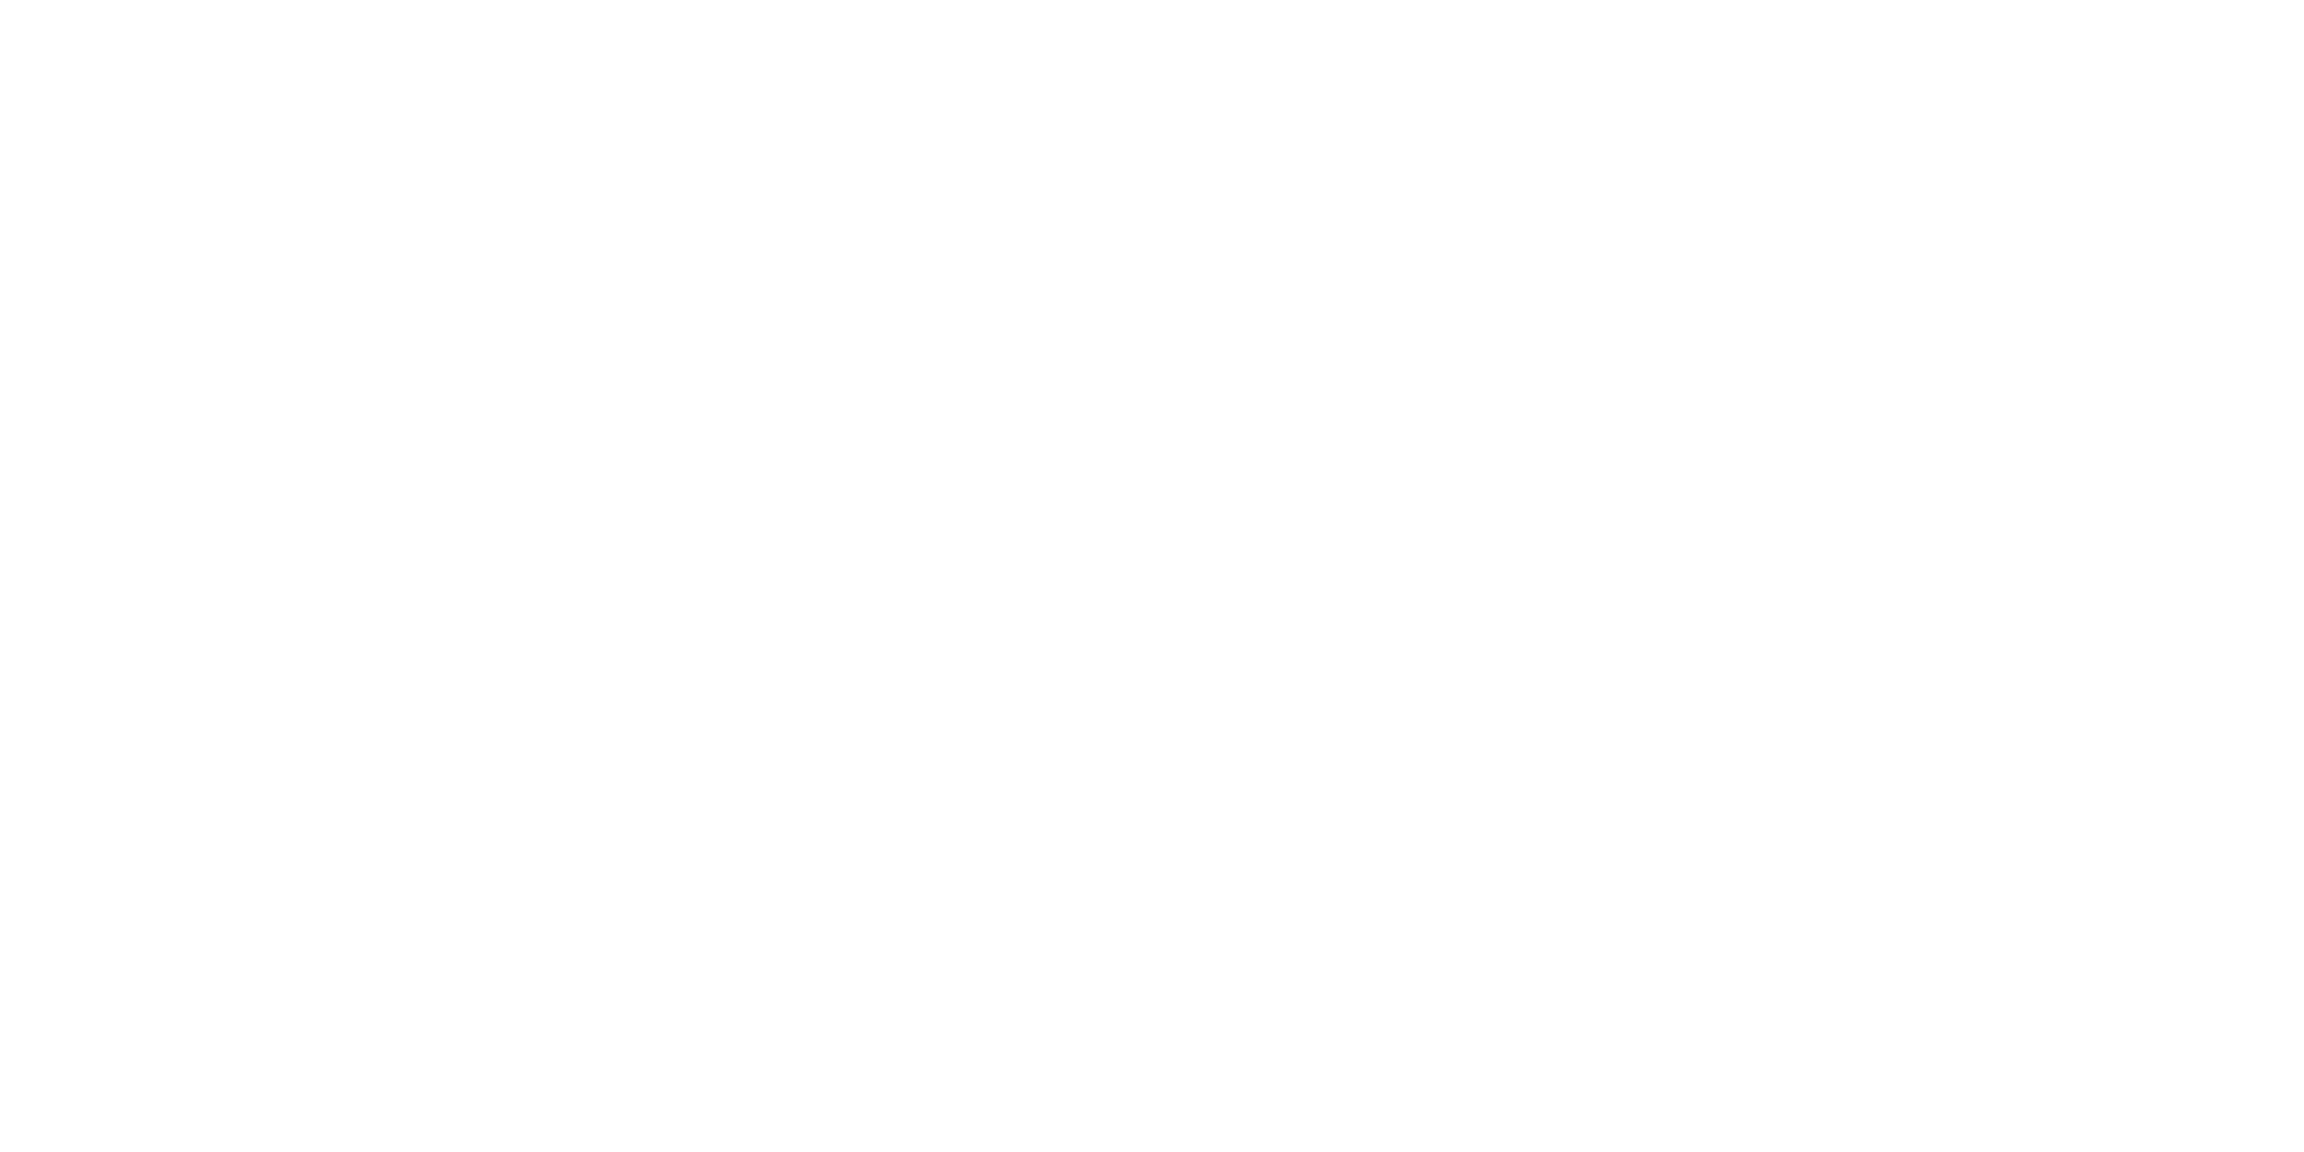

Text(0, 0.5, 'X (mm)')

<IPython.core.display.Javascript object>


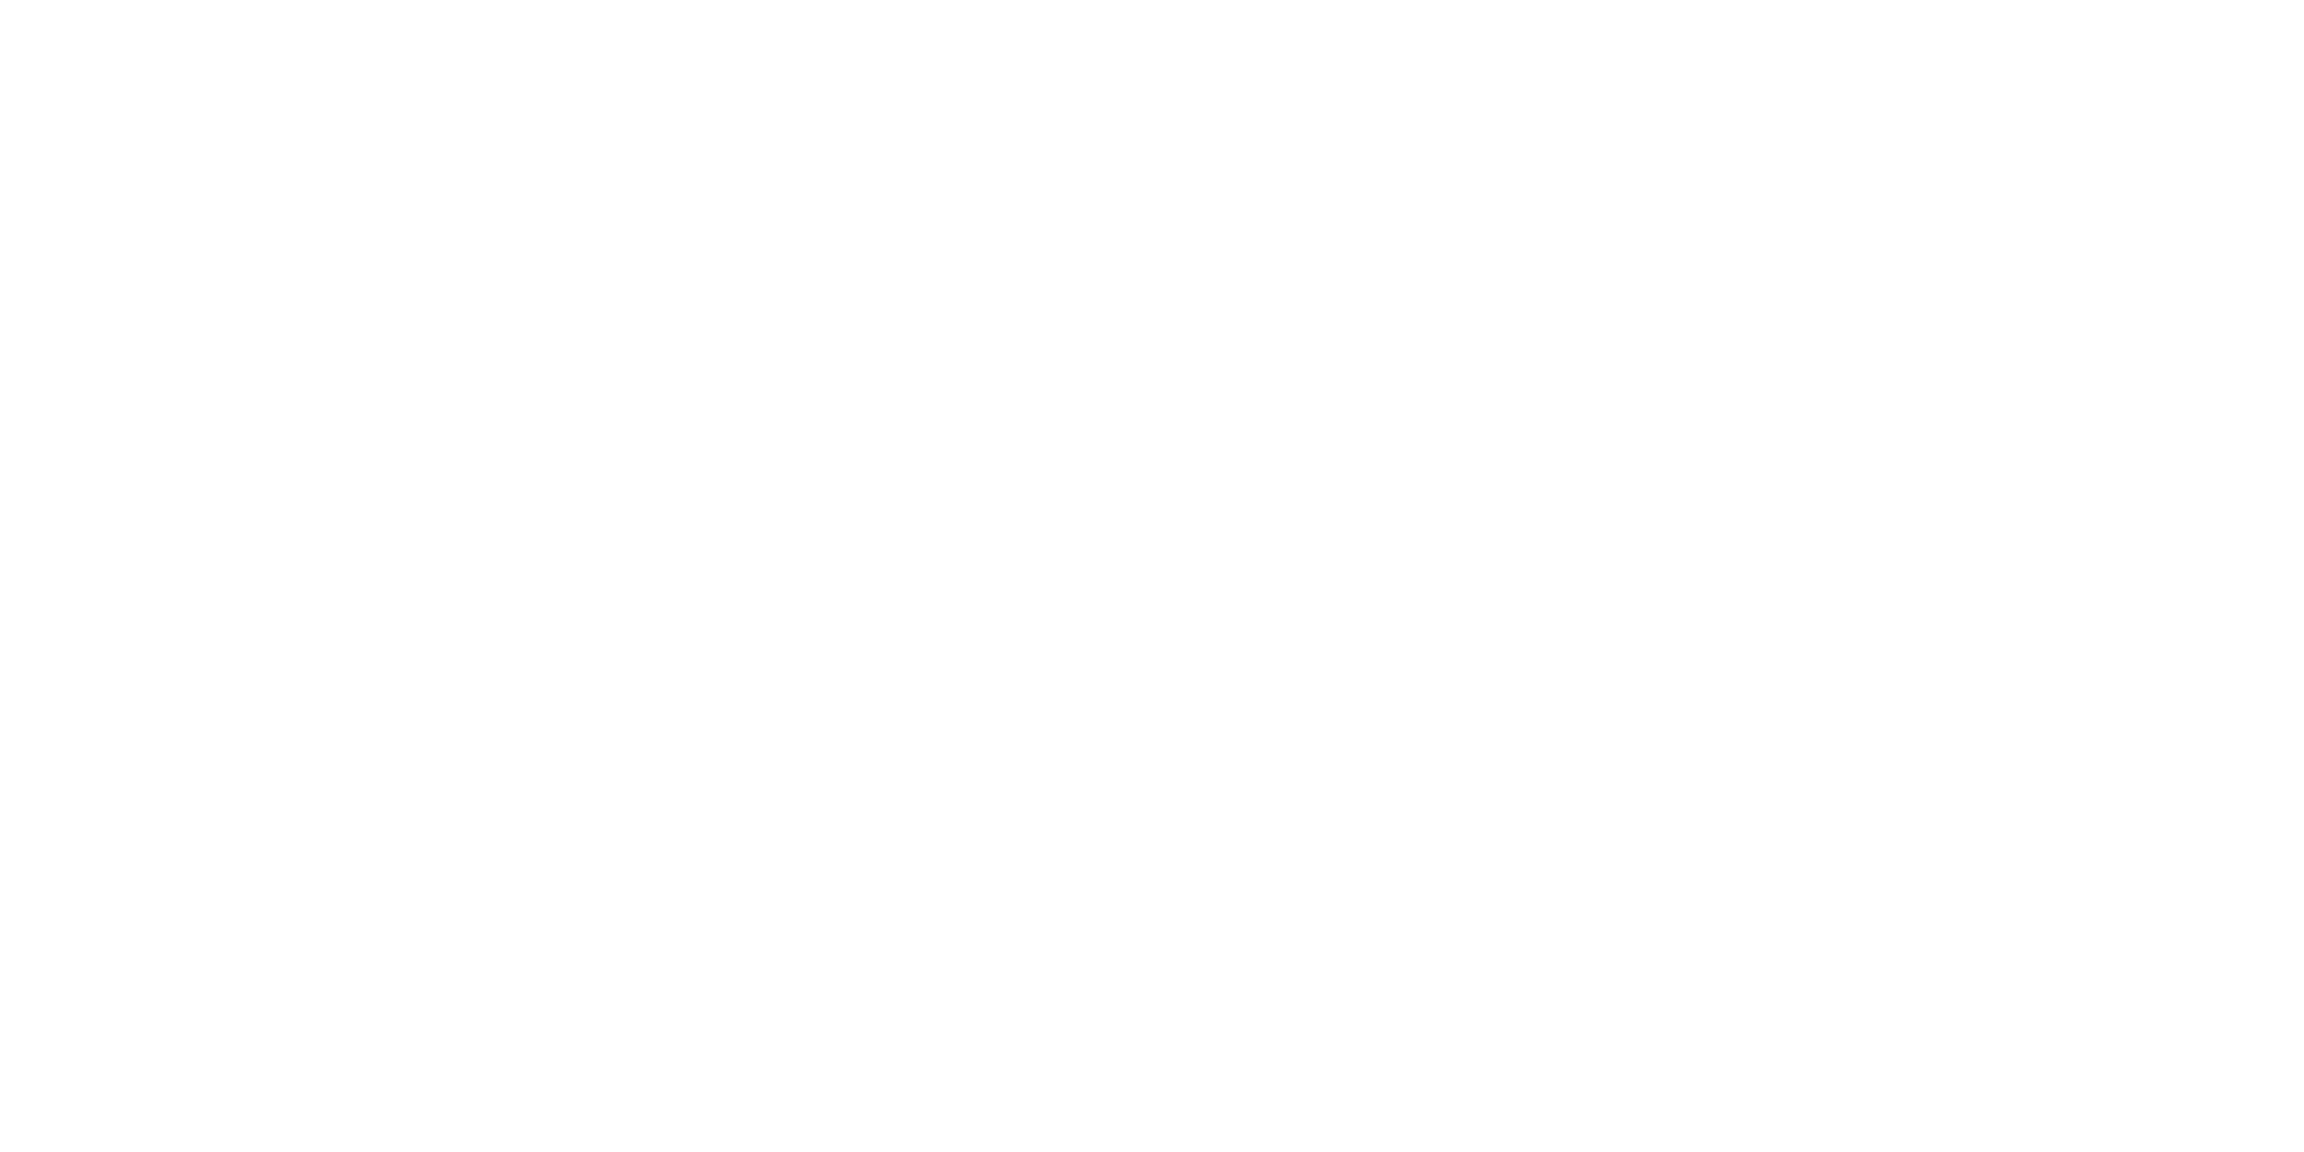

In [390]:
#fig=plt.figure(figsize=(16,8))
fig,ax = plt.subplots(figsize=(16,8))


for index, row in df_R400.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    if Y0==0:
        ax.plot([Z0,Z1],[X0,X1],"-",color=col,lw=1)
        ax.plot([Z1,Z2],[X1,X2],"-",color=col,lw=1)
        ax.plot([Z2,Z3],[X2,X3],"-",color=col,lw=1)

if 0: # check the intersection       
    plt.plot(XX,YY0,"--",color="orange",lw=2)
    plt.plot(XX,YY1,"-.",color="y",lw=2)
    plt.plot(XX,YY2,".",color="y",lw=2)


# show by computing where is the focus
plt.plot(XXX,YYY,"--",color="grey",lw=2)

for idx in np.arange(len(XI)):
        plt.scatter([XI[idx]],[YI[idx]],marker="+",color=ColorNum[idx],s=1500,lw=1)



ax.grid()
ax.set_xlim(-70,0)
ax.set_ylim(-10,30)

ax.set_aspect('equal')

ax.set_title("Ronchi 400")   
ax.set_xlabel("Z (mm)")
ax.set_ylabel("X (mm)")    

## Ronchi 350

In [391]:
central_ray=GetCentralRay(df_R350)

In [392]:
central_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
40,60,0.0,0.0,0,0.0,0.0,1.0,0.0004,b,0.0,...,8.20077,0.0,80.0,0,0.0,8.20077,0.0,80,OK,3.0
121,181,0.0,0.0,0,0.0,0.0,1.0,0.0006,g,0.0,...,12.45779,0.0,80.0,0,0.0,12.45779,0.0,80,OK,3.0
202,302,0.0,0.0,0,0.0,0.0,1.0,0.0008,r,0.0,...,16.91667,0.0,80.0,0,0.0,16.91667,0.0,80,OK,3.0
283,423,0.0,0.0,0,0.0,0.0,1.0,0.0010,k,0.0,...,21.67068,0.0,80.0,0,0.0,21.67068,0.0,80,OK,3.0


In [393]:
R0C_R350=central_ray.mean()["Z3"]-central_ray.mean()["Z2"]
X0C_R350=central_ray.mean()["Z1"]-central_ray.mean()["Z3"]
Y0C_R350=0

<IPython.core.display.Javascript object>


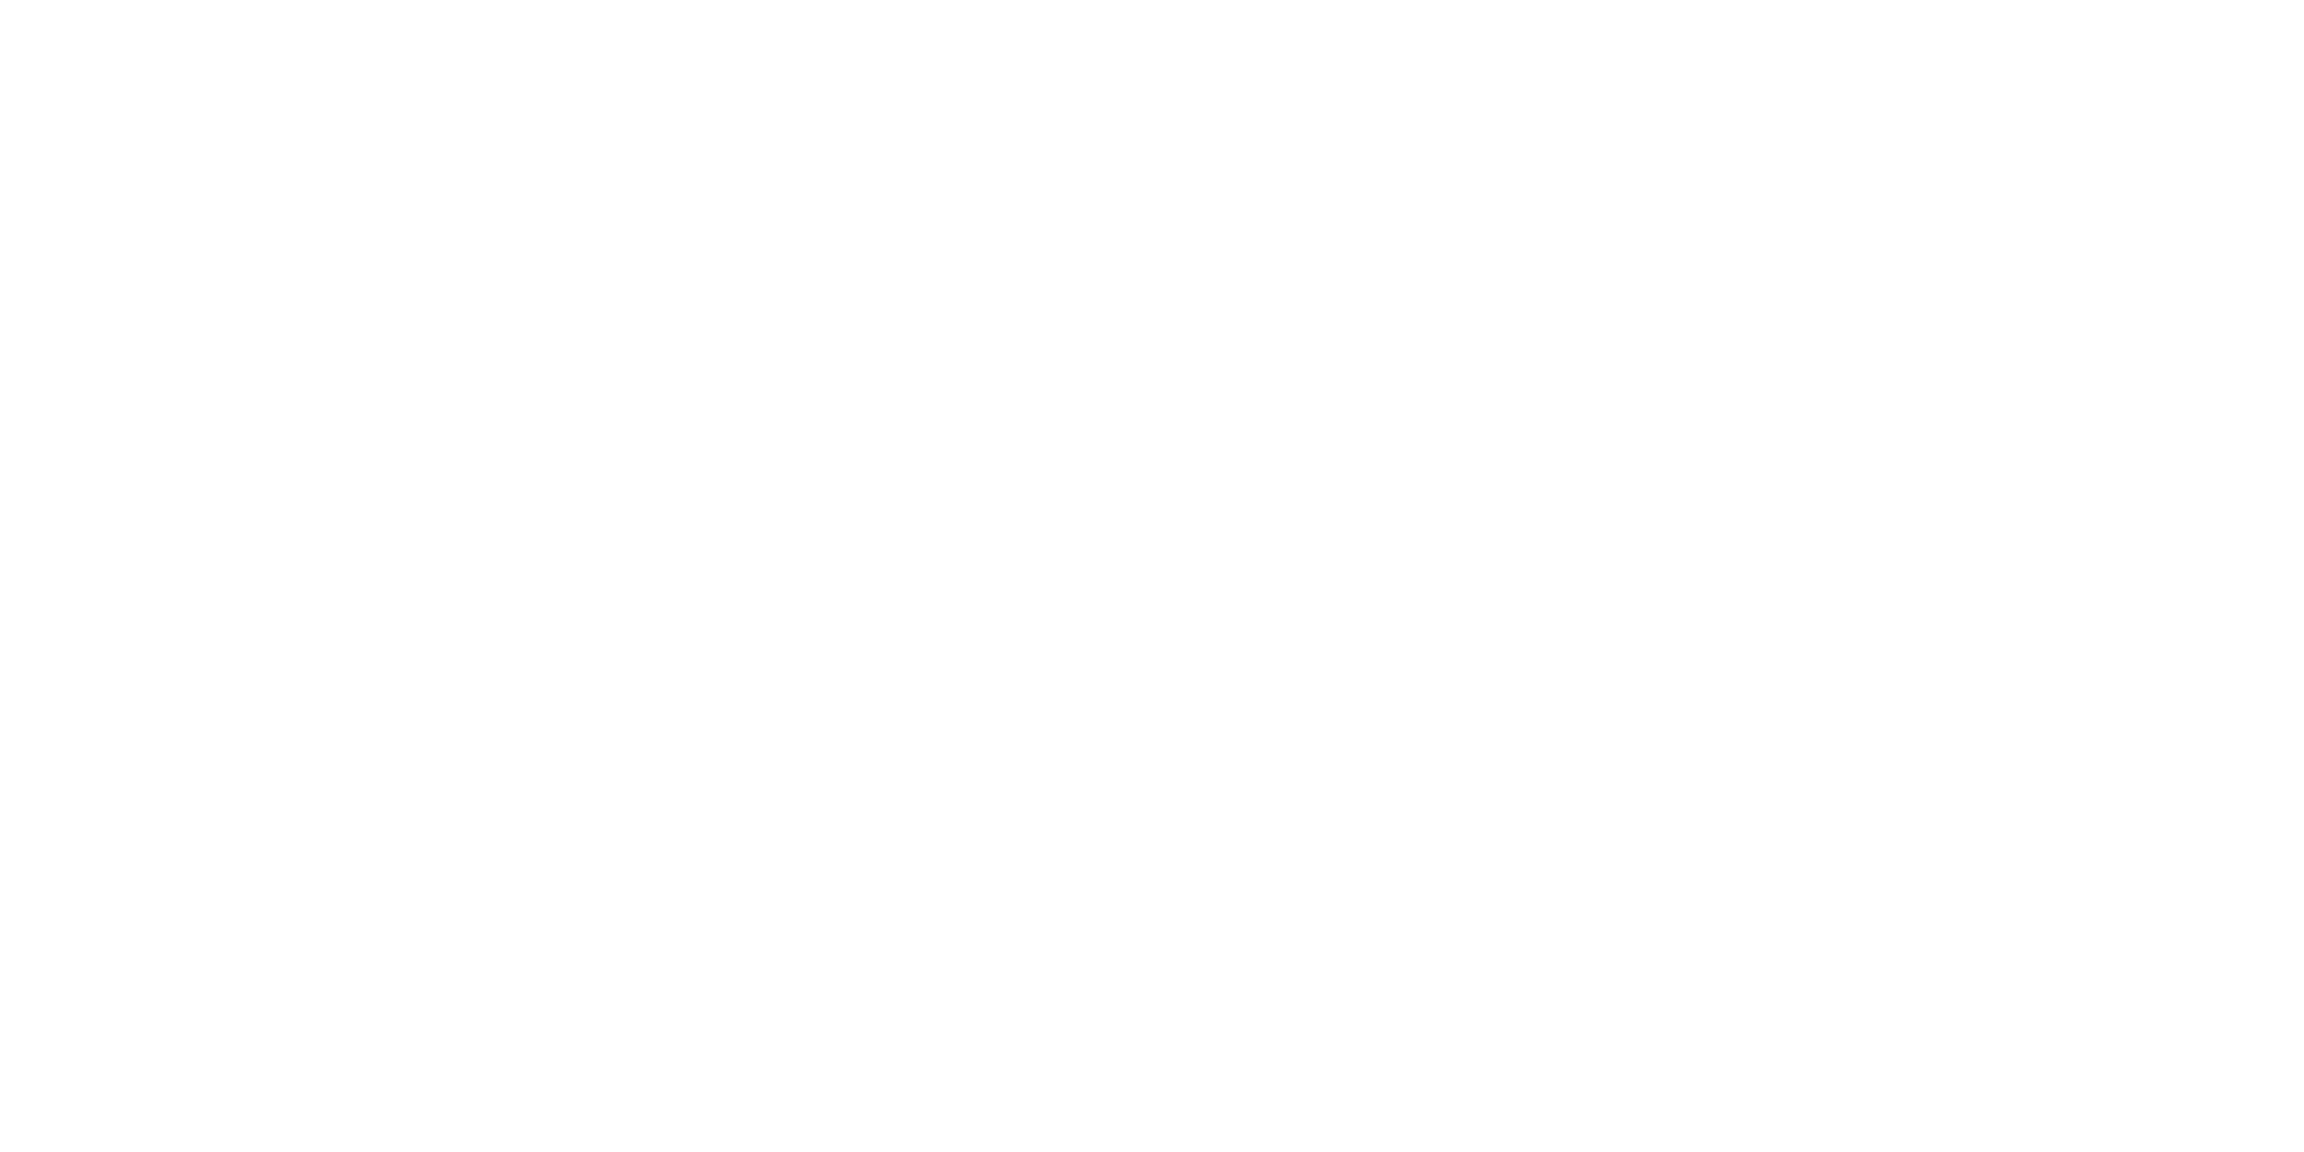

<IPython.core.display.Javascript object>


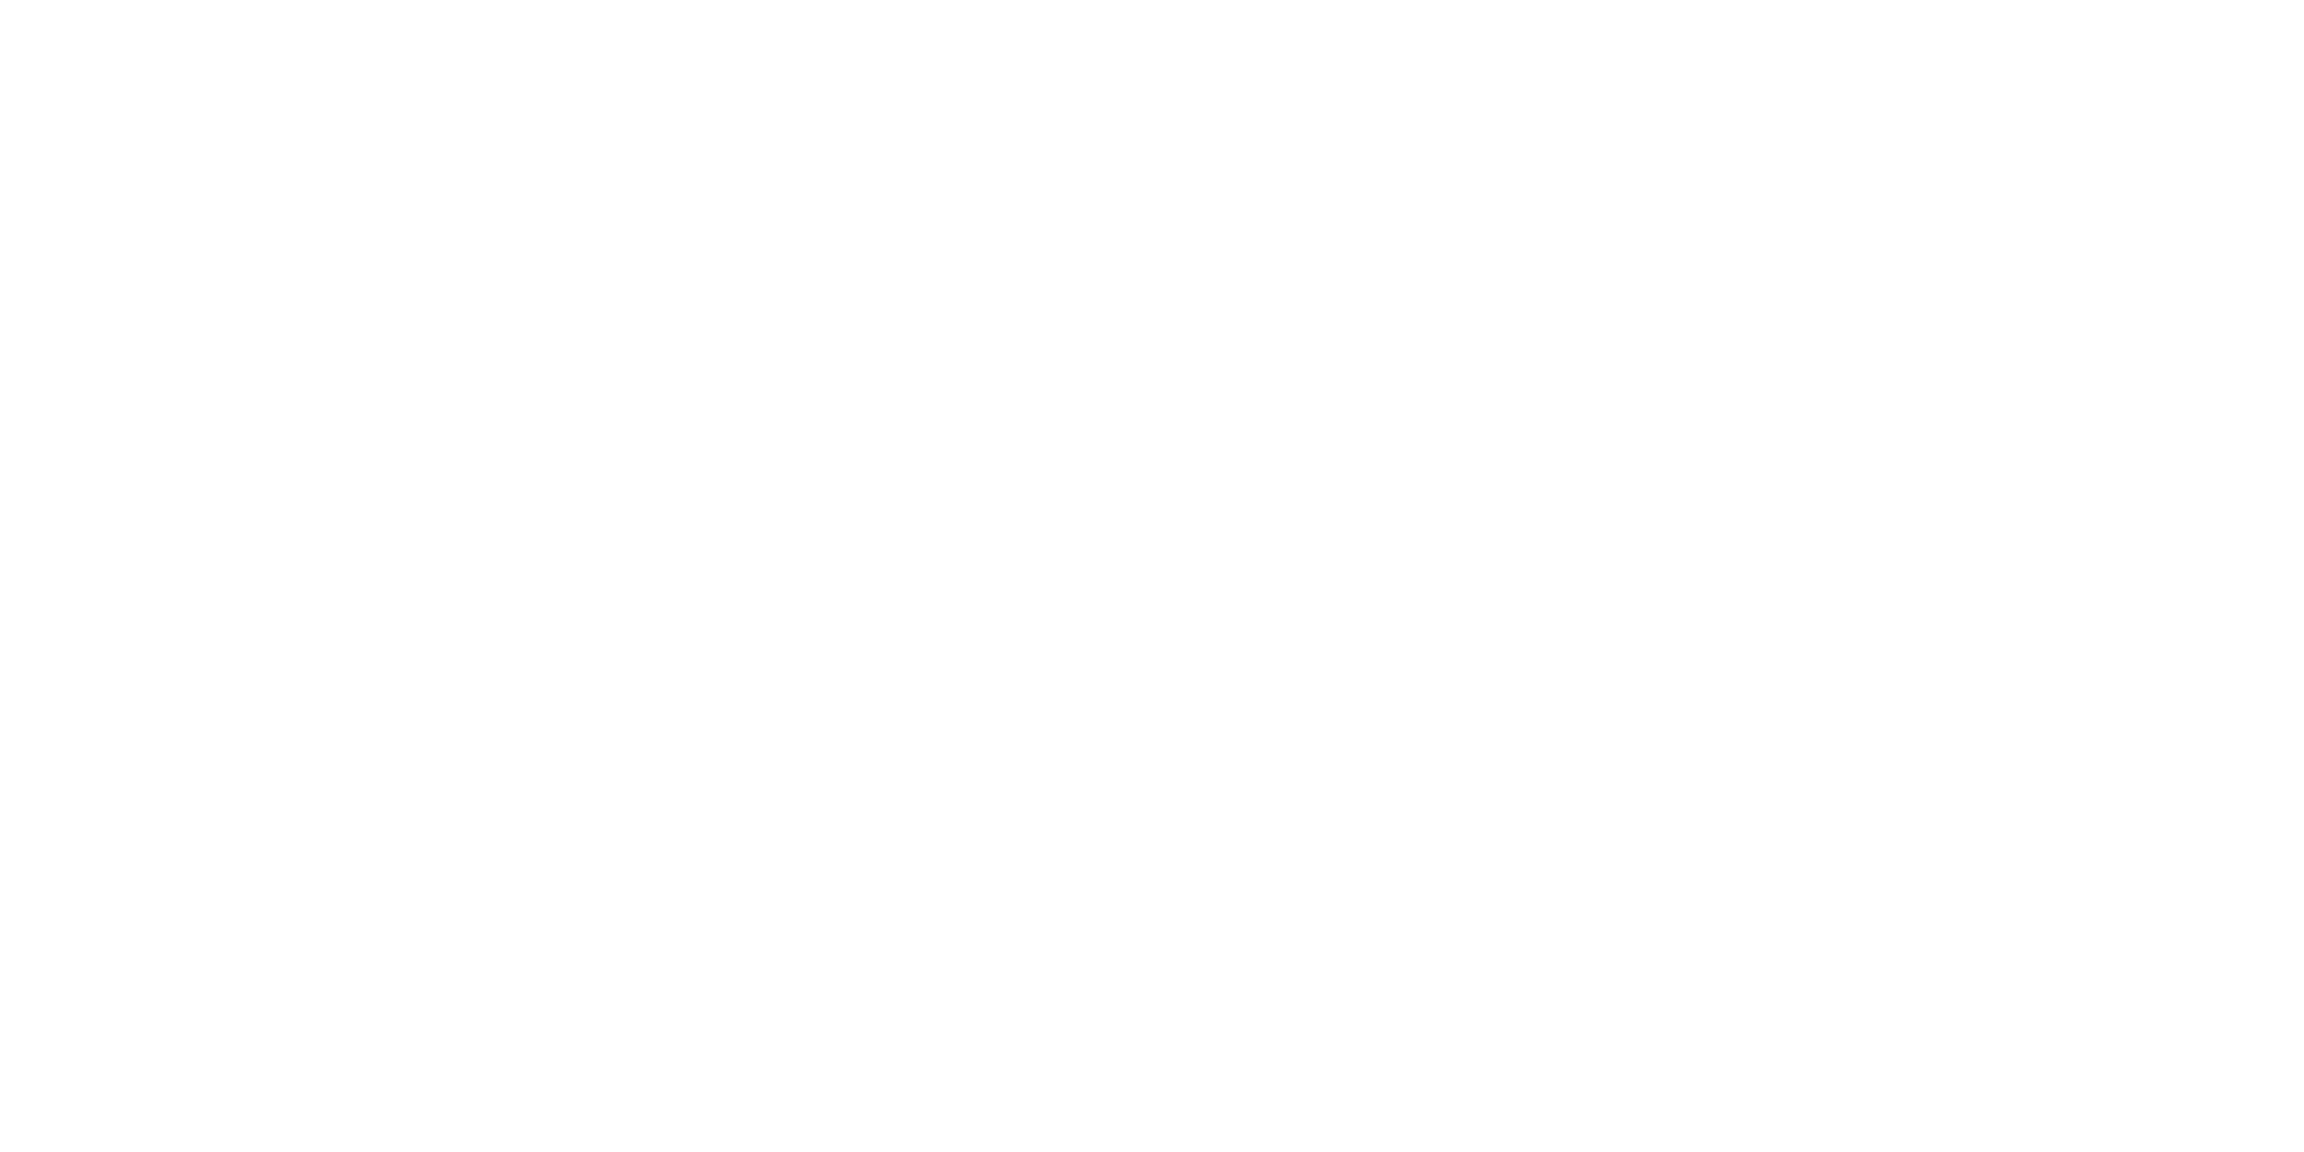

In [394]:
#fig=plt.figure(figsize=(16,8))
fig,ax = plt.subplots(figsize=(16,8))

for index, row in df_R350.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    if Y0==0:
        ax.plot([Z0,Z1],[X0,X1],"-",color=col)
        ax.plot([Z1,Z2],[X1,X2],"-",color=col)
        ax.plot([Z2,Z3],[X2,X3],"-",color=col)
        
ellipse = mpl.patches.Ellipse(xy=(X0C_R350, Y0C_R350), width=2*R0C_R350, height=2*R0C_R350,angle=1,color="grey",fill=False)        

fig.gca().add_artist(ellipse)


ax.grid()
ax.set_xlim(-70,0)
ax.set_ylim(-10,30)
ax.set_title("Ronchi 350")   
ax.set_xlabel("Z (mm)")
ax.set_ylabel("X (mm)")  
ax.set_aspect('equal')

## HOE

In [395]:
central_ray=GetCentralRay(df_hoe) 

In [396]:
central_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
40,60,0.0,0.0,0,0.0,0.0,1.0,0.0004,b,0.0,...,8.31483,0.0,79.99998,0,0,8.31483,0.0,80,OK,3
121,181,0.0,0.0,0,0.0,0.0,1.0,0.0006,g,0.0,...,12.63561,0.0,79.99998,0,0,12.63561,0.0,80,OK,3
202,302,0.0,0.0,0,0.0,0.0,1.0,0.0008,r,0.0,...,17.16732,0.0,79.99998,0,0,17.16732,0.0,80,OK,3
283,423,0.0,0.0,0,0.0,0.0,1.0,0.0010,k,0.0,...,22.00829,0.0,79.99998,0,0,22.00829,0.0,80,OK,3


In [397]:
upper_ray=GetUpperRay(df_hoe)

In [398]:
upper_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
45,65,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0004,b,2.106694,...,8.35273,0.0,79.99998,0,0,8.35273,0.0,80,OK,3
126,186,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0006,g,2.106694,...,12.64513,0.0,79.99998,0,0,12.64513,0.0,80,OK,3
207,307,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0008,r,2.106694,...,17.11278,0.0,79.99998,0,0,17.11278,0.0,80,OK,3
288,428,2.856536,0.0,0,-0.035684,0.0,0.999363,0.0010,k,2.106694,...,21.84664,0.0,79.99998,0,0,21.84664,0.0,80,OK,3


In [399]:
lower_ray=GetLowerRay(df_hoe)

In [400]:
lower_ray

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
35,55,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0004,b,-2.106694,...,8.27777,0.0,79.99998,0,0,8.27777,0.0,80,OK,3
116,176,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0006,g,-2.106694,...,12.62626,0.0,79.99998,0,0,12.62626,0.0,80,OK,3
197,297,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0008,r,-2.106694,...,17.22117,0.0,79.99998,0,0,17.22117,0.0,80,OK,3
278,418,-2.856536,0.0,0,0.035684,0.0,0.999363,0.0010,k,-2.106694,...,22.16877,0.0,79.99998,0,0,22.16877,0.0,80,OK,3


# Tools

In [401]:
def norm(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

In [402]:
def norm_row(row):
    DX=row["X3"]-row["X2"]
    DY=row["Y3"]-row["Y2"]
    DZ=row["Z3"]-row["Z2"]
    return norm(DX,DY,DZ)

In [403]:
def u_row(row):
    norm=norm_row(row)
    DX=row["X3"]-row["X2"]
    return DX/norm

In [404]:
def v_row(row):
    norm=norm_row(row)
    DY=row["Y3"]-row["Y2"]
    return DY/norm

In [405]:
def w_row(row):
    norm=norm_row(row)
    DZ=row["Z3"]-row["Z2"]
    return DZ/norm

In [406]:
def norm_check(row):
    return norm(row["Uf"],row["Vf"],row["Wf"])

# 3D

In [407]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [408]:
def GetY(X0,X,Y):
    """
    GetY(X0,X,Y)
    
    """
    N0=len(X0)
    Y0=np.zeros(N0)
    
    for idx1,theX0 in np.ndenumerate(X0):
        idx2=find_nearest_idx(X, theX0)
        Y0[idx1[0]]=Y[idx2]
        
    return Y0

# Draw defocus vs wavelength

In [409]:
df_hoe

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,5,0.000000,-2.856536,0,0.000000,0.035684,0.999363,0.0004,b,0.000000,...,8.31494,-0.01292,79.99998,0,0,8.31494,-0.01292,80,OK,3
1,13,-1.713921,-2.285228,0,0.021410,0.028547,0.999363,0.0004,b,-1.264016,...,8.29256,-0.01029,79.99998,0,0,8.29256,-0.01029,80,OK,3
2,14,-1.142614,-2.285228,0,0.014275,0.028551,0.999490,0.0004,b,-0.842678,...,8.29997,-0.01031,79.99998,0,0,8.29997,-0.01031,80,OK,3
3,15,-0.571307,-2.285228,0,0.007138,0.028553,0.999567,0.0004,b,-0.421340,...,8.30741,-0.01032,79.99998,0,0,8.30741,-0.01032,80,OK,3
4,16,0.000000,-2.285228,0,0.000000,0.028554,0.999592,0.0004,b,0.000000,...,8.31490,-0.01034,79.99998,0,0,8.31490,-0.01034,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,467,0.000000,2.285228,0,0.000000,-0.028554,0.999592,0.0010,k,0.000000,...,22.00799,-0.04306,79.99998,0,0,22.00799,-0.04306,80,OK,3
320,468,0.571307,2.285228,0,-0.007138,-0.028553,0.999567,0.0010,k,0.421340,...,21.97574,-0.04298,79.99998,0,0,21.97574,-0.04298,80,OK,3
321,469,1.142614,2.285228,0,-0.014275,-0.028551,0.999490,0.0010,k,0.842678,...,21.94344,-0.04289,79.99998,0,0,21.94344,-0.04289,80,OK,3
322,470,1.713921,2.285228,0,-0.021410,-0.028547,0.999363,0.0010,k,1.264016,...,21.91112,-0.04280,79.99998,0,0,21.91112,-0.04280,80,OK,3


## wavelength selection

In [410]:
mpl.rcParams['legend.fontsize']=10

In [411]:
wlnum_sel=3
wl_sel=WLARRAY[wlnum_sel] 

In [412]:
df_sel=df_R400.copy()

In [413]:
df_sel=df_sel.loc[df_sel["wave"]==wl_sel]

In [414]:
df_sel

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
243,368,0.000000,-2.856536,0,0.000000,0.035684,0.999363,0.001,k,0.000000,...,25.33248,0.18892,80,0,0,25.33248,0.18892,80,OK,3
244,376,-1.713921,-2.285228,0,0.021410,0.028547,0.999363,0.001,k,-1.264016,...,25.72260,0.16989,80,0,0,25.72260,0.16989,80,OK,3
245,377,-1.142614,-2.285228,0,0.014275,0.028551,0.999490,0.001,k,-0.842678,...,25.58457,0.16352,80,0,0,25.58457,0.16352,80,OK,3
246,378,-0.571307,-2.285228,0,0.007138,0.028553,0.999567,0.001,k,-0.421340,...,25.45226,0.15725,80,0,0,25.45226,0.15725,80,OK,3
247,379,0.000000,-2.285228,0,0.000000,0.028554,0.999592,0.001,k,0.000000,...,25.32557,0.15106,80,0,0,25.32557,0.15106,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,467,0.000000,2.285228,0,0.000000,-0.028554,0.999592,0.001,k,0.000000,...,25.32557,-0.15106,80,0,0,25.32557,-0.15106,80,OK,3
320,468,0.571307,2.285228,0,-0.007138,-0.028553,0.999567,0.001,k,0.421340,...,25.20437,-0.14495,80,0,0,25.20437,-0.14495,80,OK,3
321,469,1.142614,2.285228,0,-0.014275,-0.028551,0.999490,0.001,k,0.842678,...,25.08854,-0.13891,80,0,0,25.08854,-0.13891,80,OK,3
322,470,1.713921,2.285228,0,-0.021410,-0.028547,0.999363,0.001,k,1.264016,...,24.97799,-0.13296,80,0,0,24.97799,-0.13296,80,OK,3


In [415]:
df_sel["Uf"]=df_sel.apply(u_row,axis=1)
df_sel["Vf"]=df_sel.apply(v_row,axis=1)
df_sel["Wf"]=df_sel.apply(w_row,axis=1)
df_sel["Lf"]=df_sel.apply(norm_row,axis=1)

In [416]:
df_sel

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23,Uf,Vf,Wf,Lf
243,368,0.000000,-2.856536,0,0.000000,0.035684,0.999363,0.001,k,0.000000,...,0,25.33248,0.18892,80,OK,3,0.400000,0.035684,0.915820,63.331207
244,376,-1.713921,-2.285228,0,0.021410,0.028547,0.999363,0.001,k,-1.264016,...,0,25.72260,0.16989,80,OK,3,0.421410,0.028547,0.906421,63.987954
245,377,-1.142614,-2.285228,0,0.014275,0.028551,0.999490,0.001,k,-0.842678,...,0,25.58457,0.16352,80,OK,3,0.414275,0.028551,0.909704,63.757027
246,378,-0.571307,-2.285228,0,0.007138,0.028553,0.999567,0.001,k,-0.421340,...,0,25.45226,0.15725,80,OK,3,0.407138,0.028553,0.912920,63.532389
247,379,0.000000,-2.285228,0,0.000000,0.028554,0.999592,0.001,k,0.000000,...,0,25.32557,0.15106,80,OK,3,0.400000,0.028554,0.916070,63.313923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,467,0.000000,2.285228,0,0.000000,-0.028554,0.999592,0.001,k,0.000000,...,0,25.32557,-0.15106,80,OK,3,0.400000,-0.028554,0.916070,63.313923
320,468,0.571307,2.285228,0,-0.007138,-0.028553,0.999567,0.001,k,0.421340,...,0,25.20437,-0.14495,80,OK,3,0.392862,-0.028553,0.919154,63.101496
321,469,1.142614,2.285228,0,-0.014275,-0.028551,0.999490,0.001,k,0.842678,...,0,25.08854,-0.13891,80,OK,3,0.385725,-0.028551,0.922172,62.894983
322,470,1.713921,2.285228,0,-0.021410,-0.028547,0.999363,0.001,k,1.264016,...,0,24.97799,-0.13296,80,OK,3,0.378590,-0.028547,0.925124,62.694277


<IPython.core.display.Javascript object>


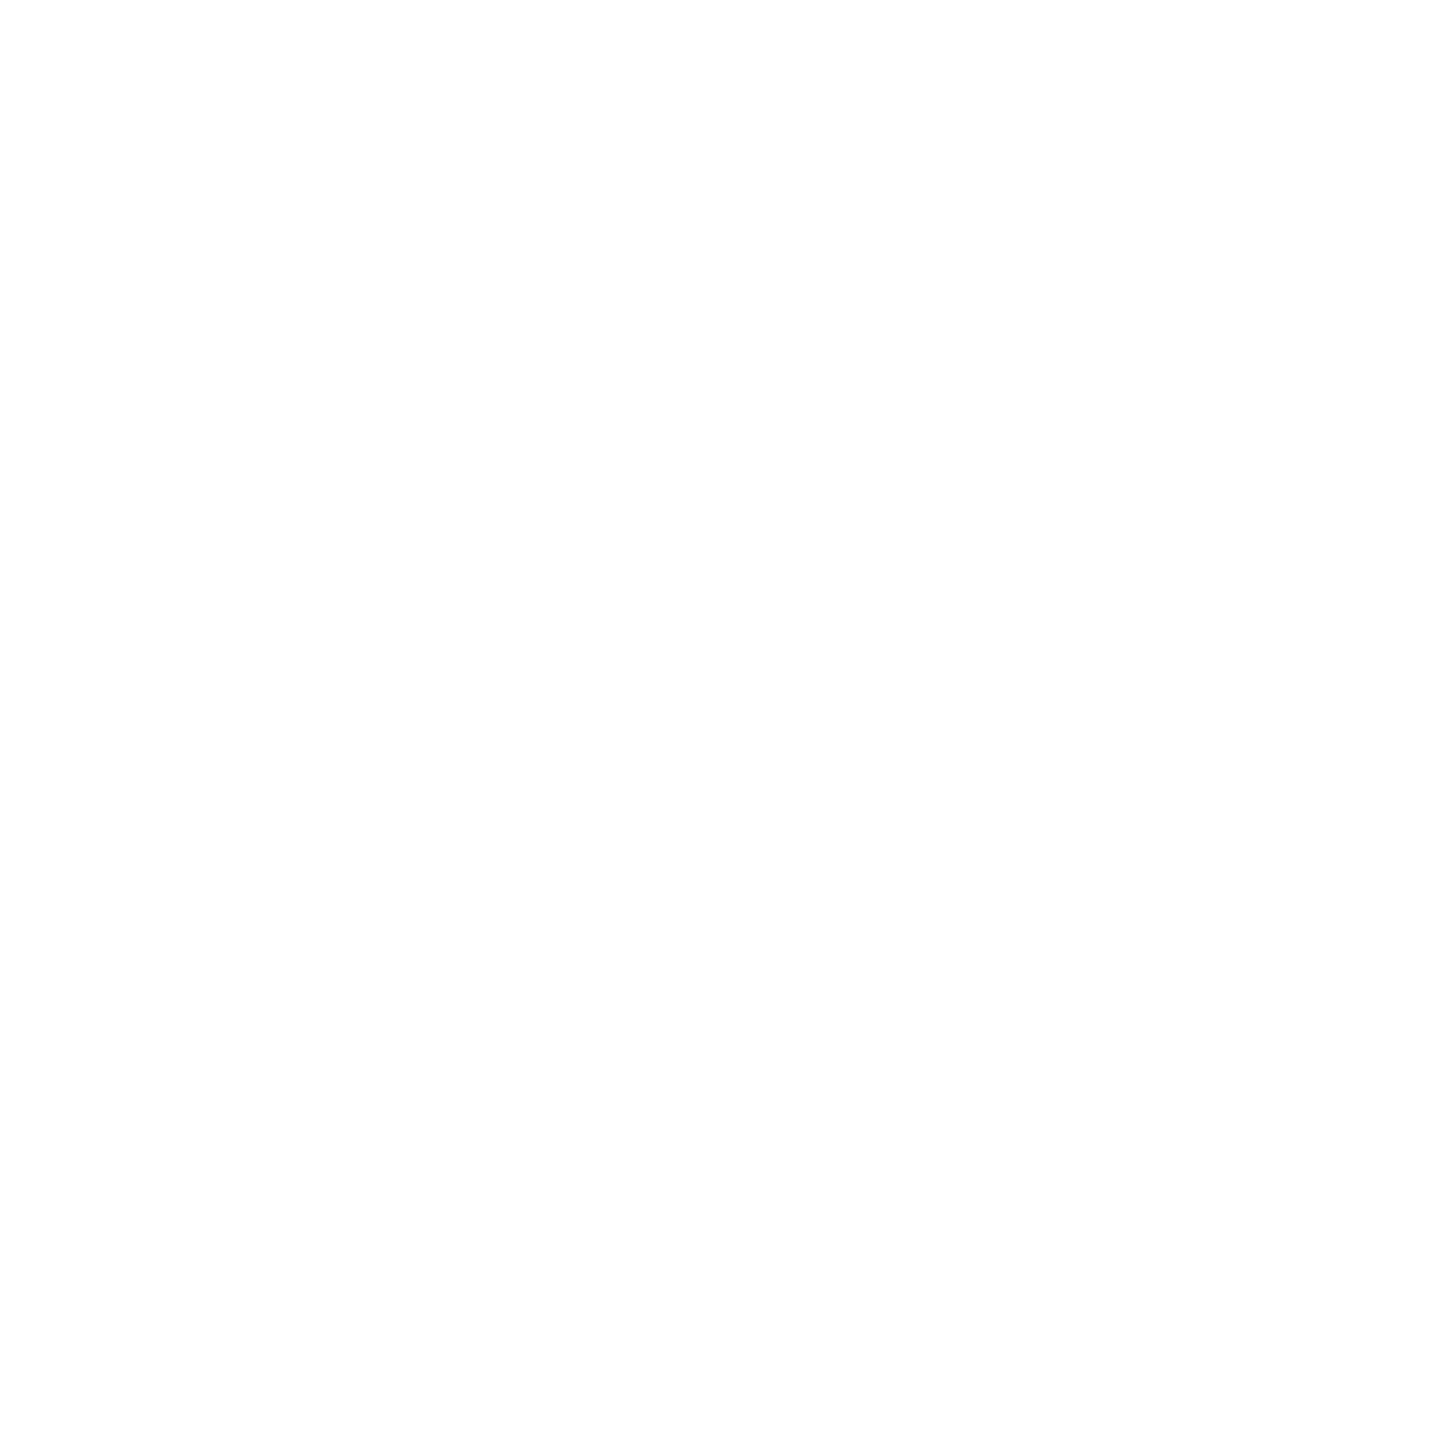

<IPython.core.display.Javascript object>


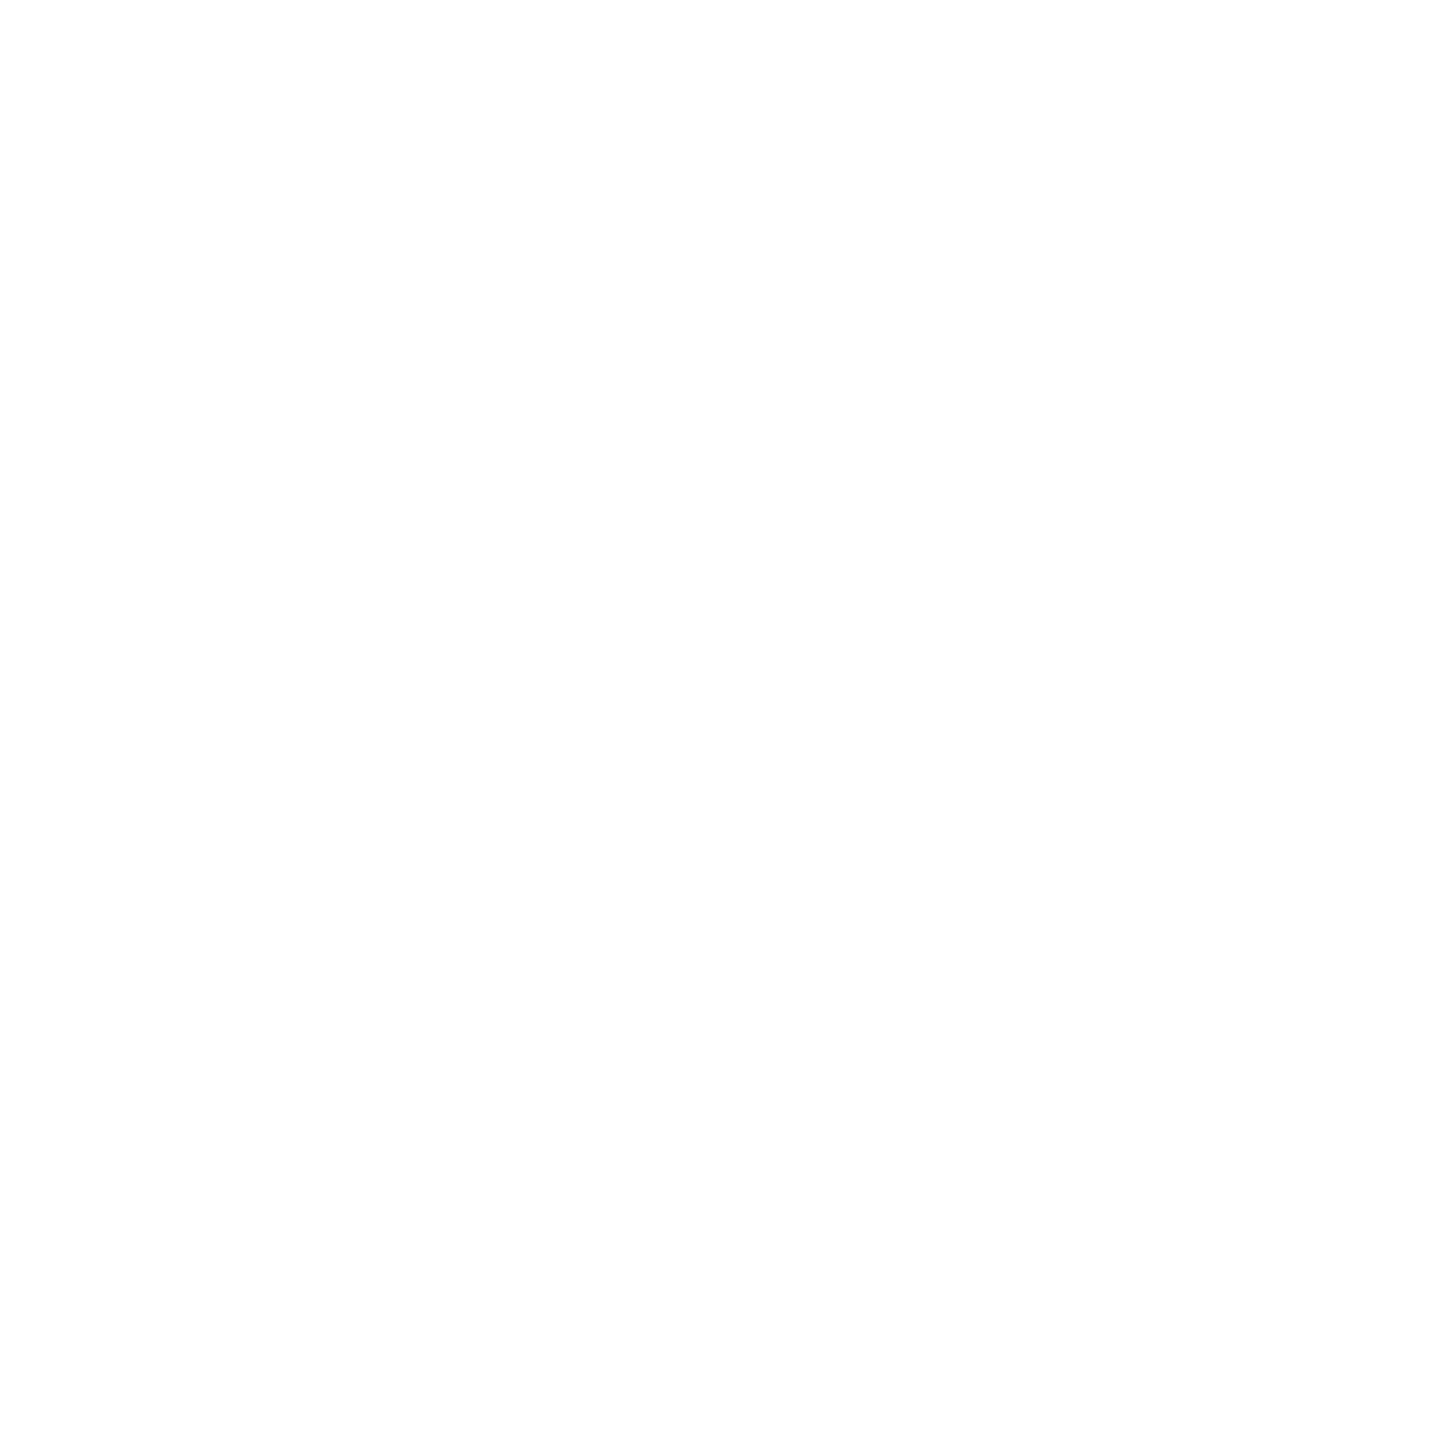

In [417]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

for index, row in df_sel.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    
    #line=Line3D([X1,X2], [Y1,Y2], [Z1,Z2], c='red', ms=12)
    #ax.add_line(line)
    line=Line3D([X2,X3], [Y2,Y3], [Z2,Z3], c='red', ms=12)
    ax.add_line(line)

ax.set_xlim(0,25)
ax.set_ylim(-12.5,12.5)
ax.set_zlim(-50,0)   
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
#ax.set_aspect("equal")
    
plt.show()    

In [418]:
df_sel1=df_sel.loc[df_sel["X0"]==0]
df_sel2=df_sel.loc[df_sel["Y0"]==0]

In [419]:
df_sel1

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23,Uf,Vf,Wf,Lf
243,368,0.0,-2.856536,0,0.0,0.035684,0.999363,0.001,k,0.0,...,0,25.33248,0.18892,80,OK,3,0.4,0.035684,0.915820,63.331207
247,379,0.0,-2.285228,0,0.0,0.028554,0.999592,0.001,k,0.0,...,0,25.32557,0.15106,80,OK,3,0.4,0.028554,0.916070,63.313923
255,390,0.0,-1.713921,0,0.0,0.021419,0.999771,0.001,k,0.0,...,0,25.32019,0.11325,80,OK,3,0.4,0.021419,0.916265,63.300476
264,401,0.0,-1.142614,0,0.0,0.014281,0.999898,0.001,k,0.0,...,0,25.31635,0.07547,80,OK,3,0.4,0.014281,0.916404,63.290873
273,412,0.0,-0.571307,0,0.0,0.007141,0.999974,0.001,k,0.0,...,0,25.31404,0.03773,80,OK,3,0.4,0.007141,0.916487,63.285108
283,423,0.0,0.000000,0,0.0,0.000000,1.000000,0.001,k,0.0,...,0,25.31328,0.00000,80,OK,3,0.4,0.000000,0.916515,63.283190
293,434,0.0,0.571307,0,0.0,-0.007141,0.999974,0.001,k,0.0,...,0,25.31404,-0.03773,80,OK,3,0.4,-0.007141,0.916487,63.285108
302,445,0.0,1.142614,0,0.0,-0.014281,0.999898,0.001,k,0.0,...,0,25.31635,-0.07547,80,OK,3,0.4,-0.014281,0.916404,63.290873
311,456,0.0,1.713921,0,0.0,-0.021419,0.999771,0.001,k,0.0,...,0,25.32019,-0.11325,80,OK,3,0.4,-0.021419,0.916265,63.300476
319,467,0.0,2.285228,0,0.0,-0.028554,0.999592,0.001,k,0.0,...,0,25.32557,-0.15106,80,OK,3,0.4,-0.028554,0.916070,63.313923


In [420]:
df_sel2

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23,Uf,Vf,Wf,Lf
278,418,-2.856536,0.0,0,0.035684,0.0,0.999363,0.001,k,-2.106694,...,0,26.00332,0.0,80,OK,3,0.435684,0.0,0.900100,64.437310
279,419,-2.285228,0.0,0,0.028554,0.0,0.999592,0.001,k,-1.685356,...,0,25.85363,0.0,80,OK,3,0.428554,0.0,0.903516,64.193638
280,420,-1.713921,0.0,0,0.021419,0.0,0.999771,0.001,k,-1.264017,...,0,25.70991,0.0,80,OK,3,0.421419,0.0,0.906866,63.956526
281,421,-1.142614,0.0,0,0.014281,0.0,0.999898,0.001,k,-0.842678,...,0,25.57202,0.0,80,OK,3,0.414281,0.0,0.910149,63.725836
282,422,-0.571307,0.0,0,0.007141,0.0,0.999974,0.001,k,-0.421338,...,0,25.43985,0.0,80,OK,3,0.407141,0.0,0.913365,63.501432
283,423,0.000000,0.0,0,0.000000,0.0,1.000000,0.001,k,0.000000,...,0,25.31328,0.0,80,OK,3,0.400000,0.0,0.916515,63.283190
284,424,0.571307,0.0,0,-0.007141,0.0,0.999974,0.001,k,0.421338,...,0,25.19219,0.0,80,OK,3,0.392859,0.0,0.919599,63.070982
285,425,1.142614,0.0,0,-0.014281,0.0,0.999898,0.001,k,0.842678,...,0,25.07649,0.0,80,OK,3,0.385719,0.0,0.922616,62.864695
286,426,1.713921,0.0,0,-0.021419,0.0,0.999771,0.001,k,1.264017,...,0,24.96607,0.0,80,OK,3,0.378581,0.0,0.925568,62.664212
287,427,2.285228,0.0,0,-0.028554,0.0,0.999592,0.001,k,1.685356,...,0,24.86082,0.0,80,OK,3,0.371446,0.0,0.928454,62.469409


<IPython.core.display.Javascript object>


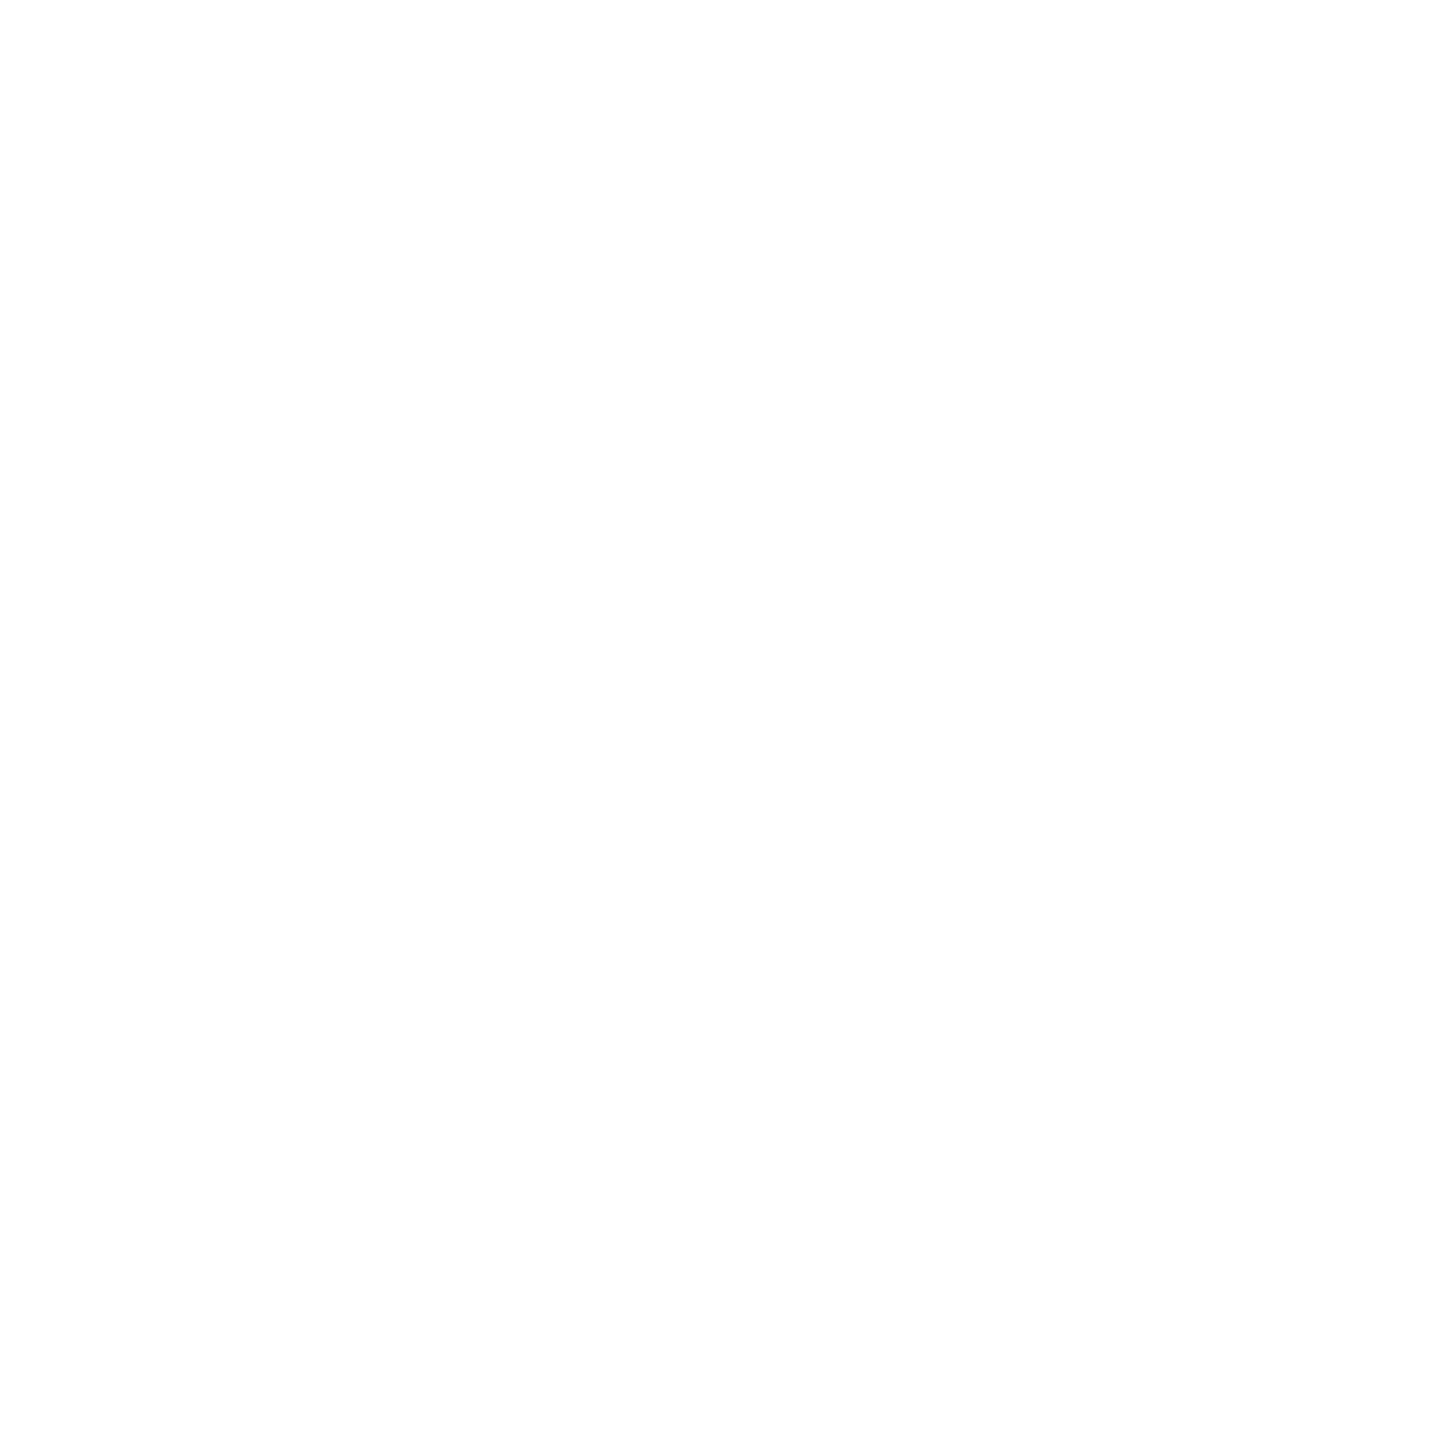

<IPython.core.display.Javascript object>


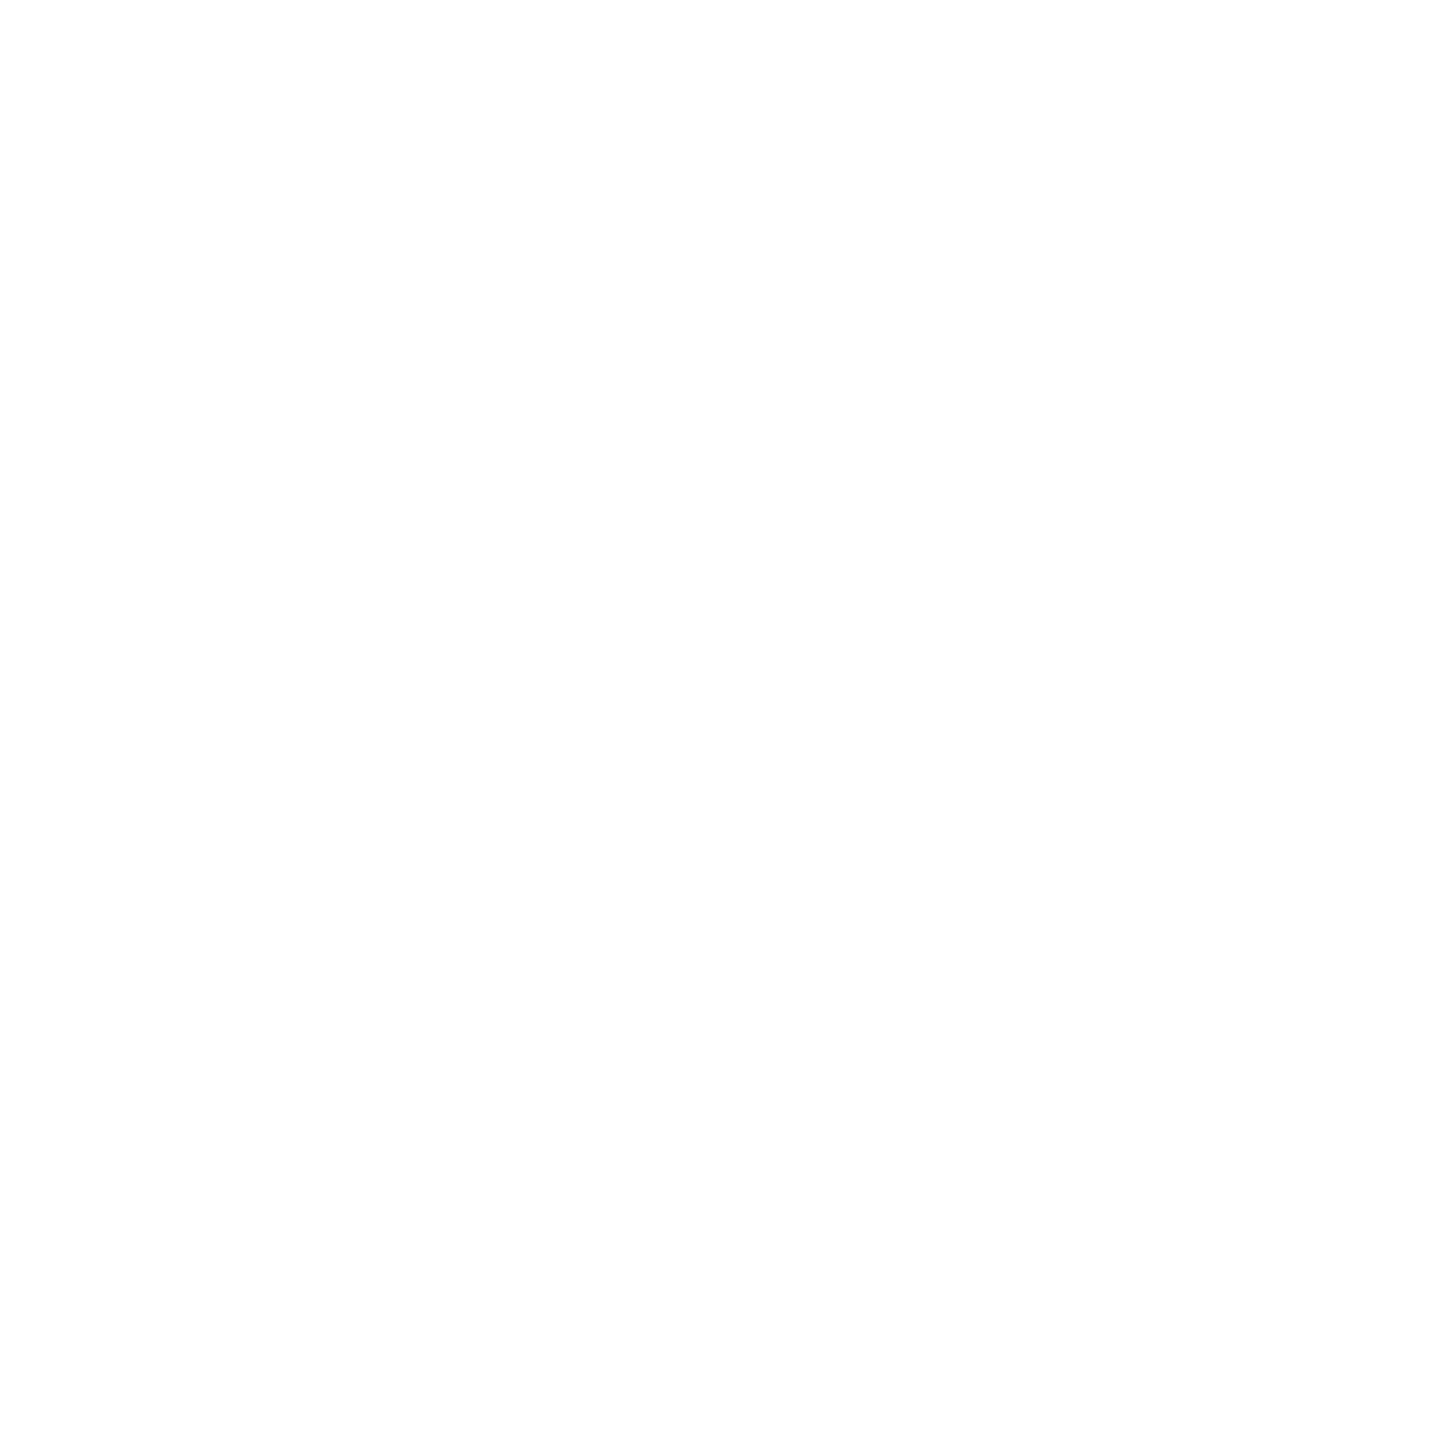

In [421]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

for index, row in df_sel1.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    
    #line=Line3D([X1,X2], [Y1,Y2], [Z1,Z2], c='red', ms=12)
    #ax.add_line(line)
    line=Line3D([X2,X3], [Y2,Y3], [Z2,Z3], c='red', ms=12)
    ax.add_line(line)
    
for index, row in df_sel2.iterrows():
    wl=row["wave"]
    col=ColorDict[wl]
    X0=row["X0"];Y0=row["Y0"];Z0=row["Z0"]-row["Z3"]
    X1=row["X1"];Y1=row["Y1"];Z1=row["Z1"]-row["Z3"]
    X2=row["X2"];Y2=row["Y2"];Z2=row["Z2"]-row["Z3"]
    X3=row["X3"];Y3=row["Y3"];Z3=row["Z3"]-row["Z3"]
    
    #line=Line3D([X1,X2], [Y1,Y2], [Z1,Z2], c='red', ms=12)
    #ax.add_line(line)
    line=Line3D([X2,X3], [Y2,Y3], [Z2,Z3], c='blue', ms=12)
    ax.add_line(line)    
    
    

ax.set_xlim(-6,20)
ax.set_ylim(-12.5,12.5)
ax.set_zlim(-50,0)   
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
#ax.set_aspect("equal")
    
plt.show()    